In [116]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Opponent="Opponent"
Players = player_ids
Serve_position = ["Ad_Wide", "Ad_Mid", "Ad_T",
           "Deuce_T", "Deuce_Mid", "Deuce_Wide"]

#dummy data
serves = features_data

In [95]:
serves[1]

array([67, 57, 67, 43, 75, 78])

In [6]:
file = open('/Users/Tomi/Downloads/atp_df_12_21_with_names_CORRECT.csv')

In [7]:
df = pd.read_csv(file)

In [9]:
df.head()

,Unnamed: 0,ref,T_1st_ad_%ServesWon,T_1st_ad_Aces,T_1st_ad_Unreturned,T_1st_ad_Returned,T_1st_ad_AvgSpeed,M_1st_ad_%ServesWon,M_1st_ad_Aces,M_1st_ad_Unreturned,...,M_2nd_d_Unreturned,M_2nd_d_Returned,M_2nd_d_AvgSpeed,W_2nd_d_%ServesWon,W_2nd_d_Aces,W_2nd_d_Unreturned,W_2nd_d_Returned,W_2nd_d_AvgSpeed,year,OpponentName
0,0,DH50,50.0%,0,2,8,119.0,0.0%,0,0,...,1,4,92.0,80.0%,0,1,4,92.0,2021,Alejandro Davidovich Fokina
1,1,E687,66.7%,1,0,8,111.0,57.1%,0,2,...,1,8,96.0,55.6%,0,1,8,96.0,2021,Daniel Evans
2,2,FB98,44.4%,1,2,15,127.0,0.0%,0,0,...,0,14,100.0,42.9%,0,0,14,100.0,2021,Taylor Fritz
3,3,FB98,40.0%,0,3,12,123.0,33.3%,0,0,...,0,14,94.0,33.3%,0,0,3,97.0,2019,Taylor Fritz
4,4,F724,84.6%,1,4,8,120.0,0.0%,0,0,...,0,3,92.0,33.3%,0,0,3,92.0,2021,Marton Fucsovics


In [25]:
player_ids = df['ref']
player_ids

0      DH50
1      E687
2      FB98
3      FB98
4      F724
       ... 
168    A596
169    d402
170    G676
171    G806
172    H756
Name: ref, Length: 173, dtype: object

In [28]:
player_ids = player_ids.to_list()

In [49]:
type(player_ids)

list

In [52]:
features = df[['T_1st_ad_%ServesWon',
             'M_1st_ad_%ServesWon',
             'W_1st_ad_%ServesWon',
             'T_1st_d_%ServesWon',
             'M_1st_d_%ServesWon',
             'W_1st_d_%ServesWon']]

In [56]:
features_labels = features.keys()

In [58]:
type(features_labels)

pandas.core.indexes.base.Index

In [60]:
features_labels = features_labels.to_list()

In [61]:
features_labels

['T_1st_ad_%ServesWon',
 'M_1st_ad_%ServesWon',
 'W_1st_ad_%ServesWon',
 'T_1st_d_%ServesWon',
 'M_1st_d_%ServesWon',
 'W_1st_d_%ServesWon']

In [69]:
features_data = df[features_labels]
features_data

,T_1st_ad_%ServesWon,M_1st_ad_%ServesWon,W_1st_ad_%ServesWon,T_1st_d_%ServesWon,M_1st_d_%ServesWon,W_1st_d_%ServesWon
0,50.0%,0.0%,66.7%,55.6%,25.0%,40.0%
1,66.7%,57.1%,66.7%,42.9%,75.0%,77.8%
2,44.4%,0.0%,78.6%,64.7%,0.0%,50.0%
3,40.0%,33.3%,33.3%,66.7%,0.0%,0.0%
4,84.6%,0.0%,61.5%,73.3%,0.0%,66.7%
...,...,...,...,...,...,...
168,62.5%,62.5%,60.0%,70.0%,50.0%,66.7%
169,0.0%,75.0%,100.0%,50.0%,0.0%,0.0%
170,61.1%,0.0%,61.5%,76.9%,100.0%,58.3%
171,66.7%,100.0%,83.3%,66.7%,50.0%,50.0%


In [71]:
features_data.values

array([['50.0%', '0.0%', '66.7%', '55.6%', '25.0%', '40.0%'],
       ['66.7%', '57.1%', '66.7%', '42.9%', '75.0%', '77.8%'],
       ['44.4%', '0.0%', '78.6%', '64.7%', '0.0%', '50.0%'],
       ...,
       ['61.1%', '0.0%', '61.5%', '76.9%', '100.0%', '58.3%'],
       ['66.7%', '100.0%', '83.3%', '66.7%', '50.0%', '50.0%'],
       ['71.4%', '33.3%', '0.0%', '28.6%', '75.0%', '40.0%']],
      dtype=object)

In [73]:
features_data = features_data.applymap(lambda x : round(float(x.strip('%'))))

In [74]:
features_data

,T_1st_ad_%ServesWon,M_1st_ad_%ServesWon,W_1st_ad_%ServesWon,T_1st_d_%ServesWon,M_1st_d_%ServesWon,W_1st_d_%ServesWon
0,50,0,67,56,25,40
1,67,57,67,43,75,78
2,44,0,79,65,0,50
3,40,33,33,67,0,0
4,85,0,62,73,0,67
...,...,...,...,...,...,...
168,62,62,60,70,50,67
169,0,75,100,50,0,0
170,61,0,62,77,100,58
171,67,100,83,67,50,50


In [76]:
features_data = np.array(features_data)
features_data

array([[ 50,   0,  67,  56,  25,  40],
       [ 67,  57,  67,  43,  75,  78],
       [ 44,   0,  79,  65,   0,  50],
       ...,
       [ 61,   0,  62,  77, 100,  58],
       [ 67, 100,  83,  67,  50,  50],
       [ 71,  33,   0,  29,  75,  40]])

'FB98'

In [91]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",size=20)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [ ]:
/Users/Tomi/Downloads/Heatmaps
plt.savefig('output.png')

In [127]:
serves[0].shape

(6,)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (4).

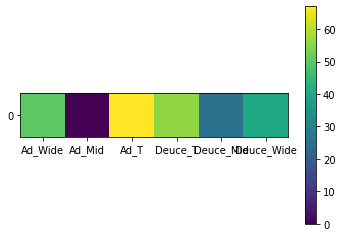

In [130]:
heatmap(serves[0].reshape(1,6), Players[0], Serve_position)

In [120]:
for i in player_ids:
    im, cbar = heatmap(serves[i], Players[i], Serve_position, ax=ax[i],
    cmap="YlGn", cbarlabel="% 1st serves won")

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(10)
    
    #texts = annotate_heatmap(im, valfmt="{x:.1f} t")
    ax.set_title("Opponent serves")
    fig.tight_layout()
    plt.show()
    plt.savefig(f'player{x}plot')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [131]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",size=20)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None,size=20), **kw,size=20)
            texts.append(text)

    return texts

In [136]:
serves[0]

array([50,  0, 67, 56, 25, 40])

In [151]:
player_ids.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

DH50


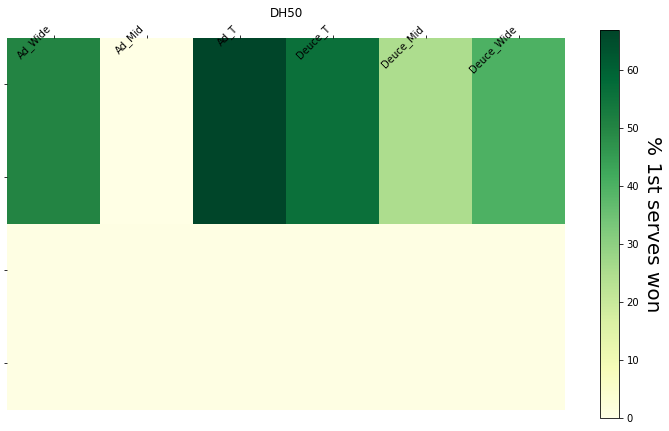

E687


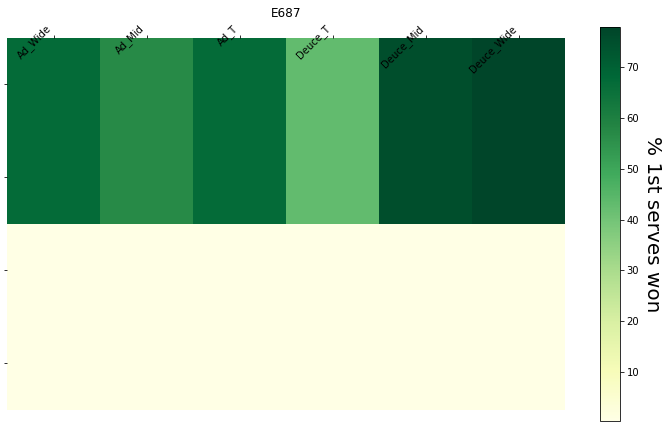

FB98


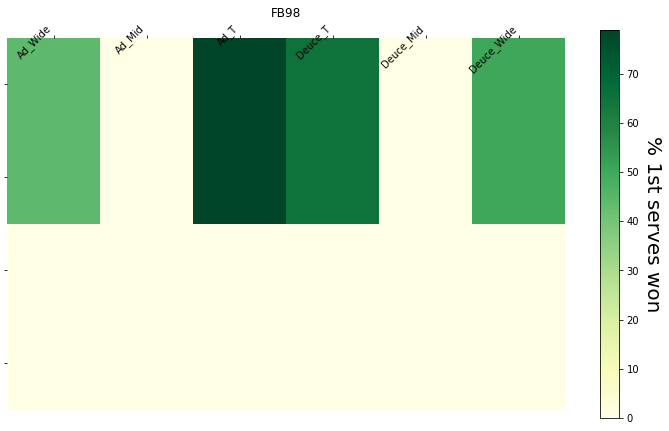

FB98


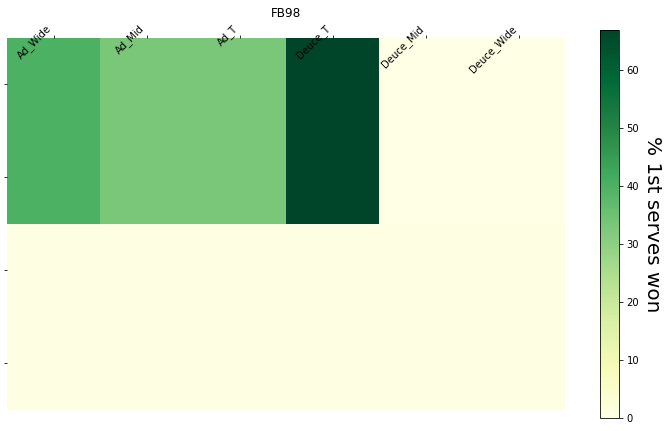

F724


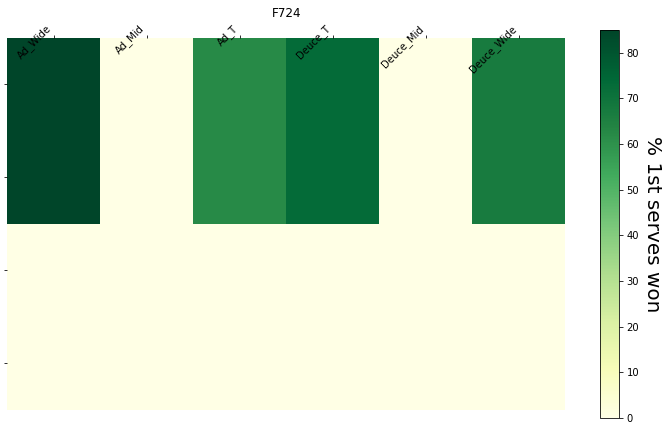

HB71


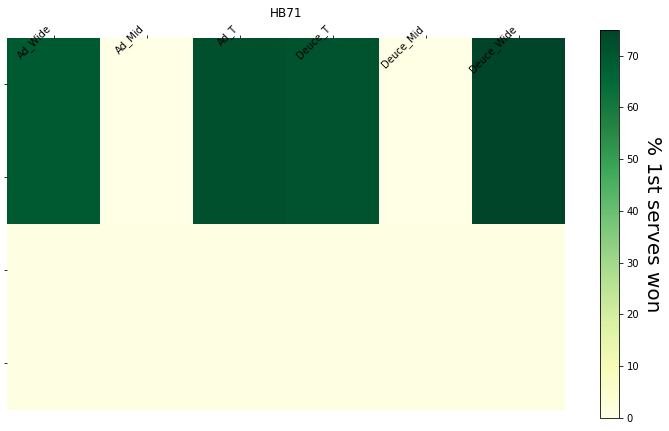

MM58


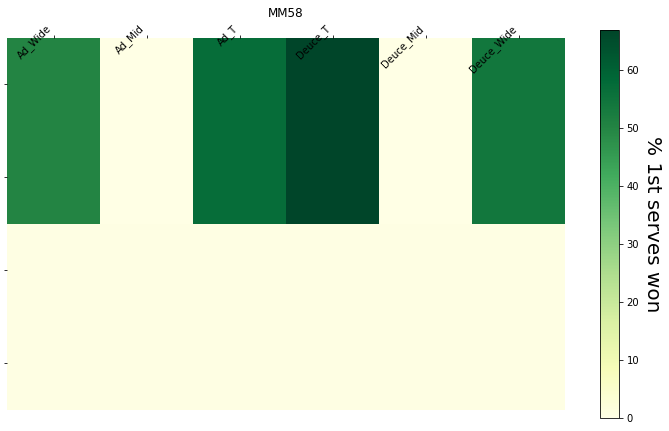

MM58


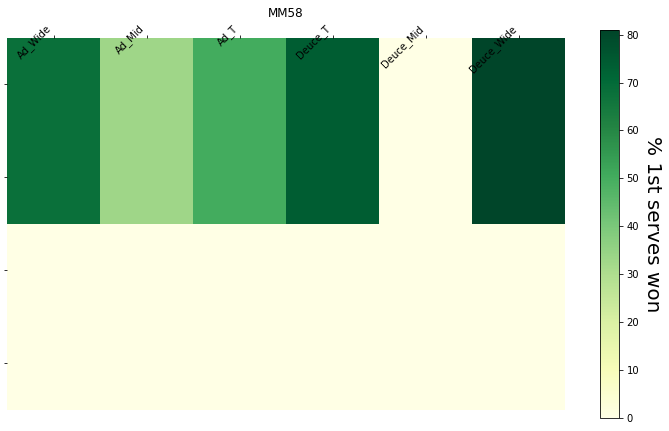

MM58


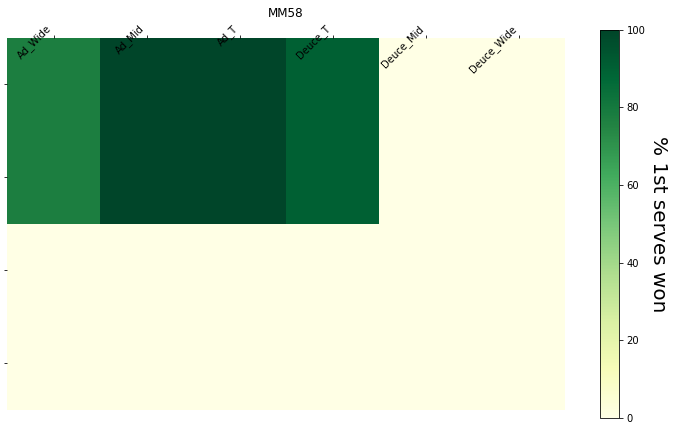

n409


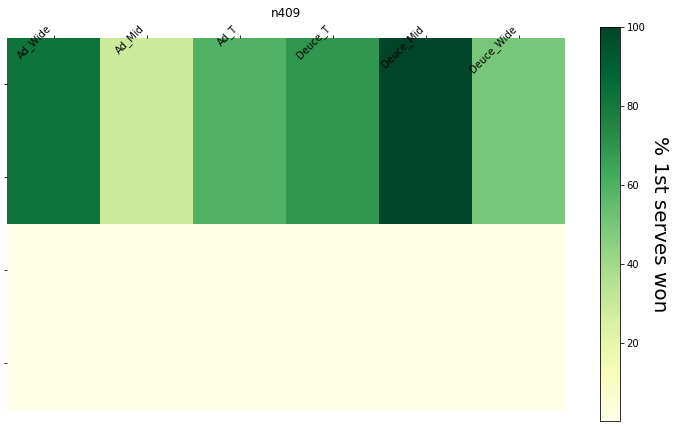

n409


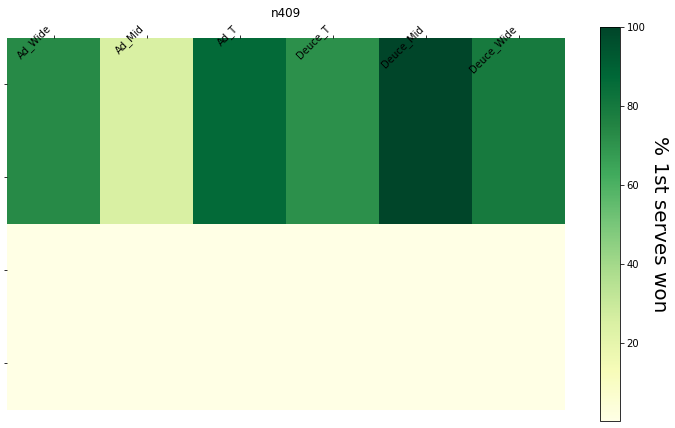

n409


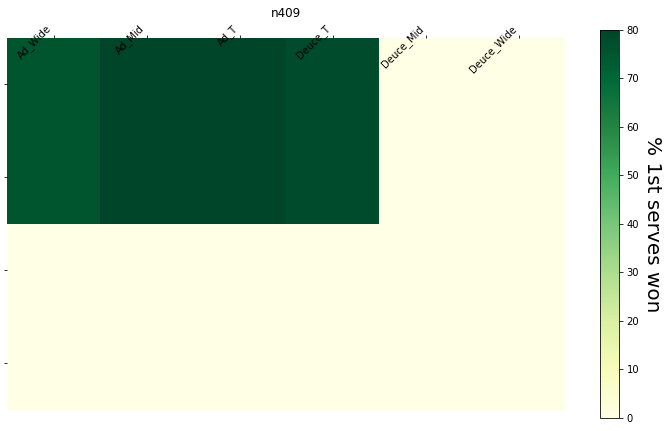

n409


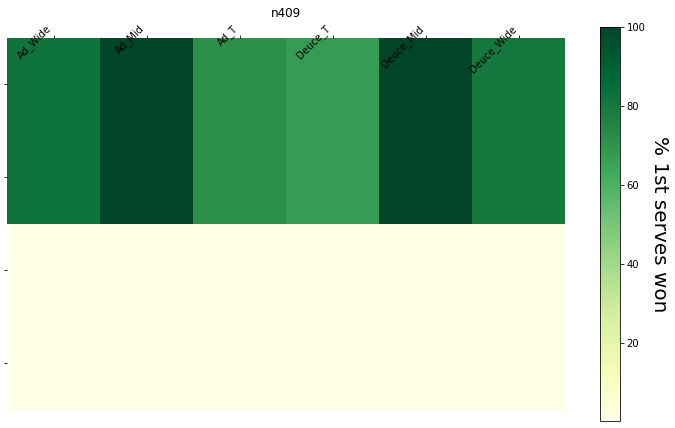

n409


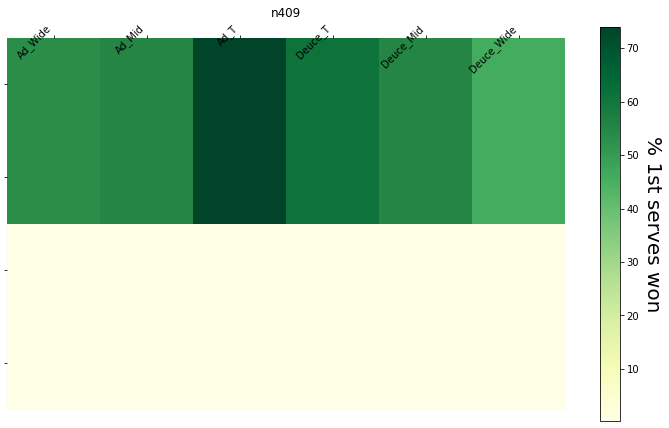

n409


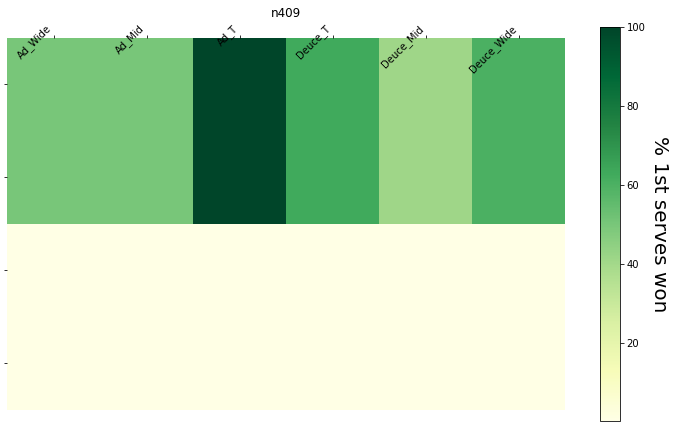

n409


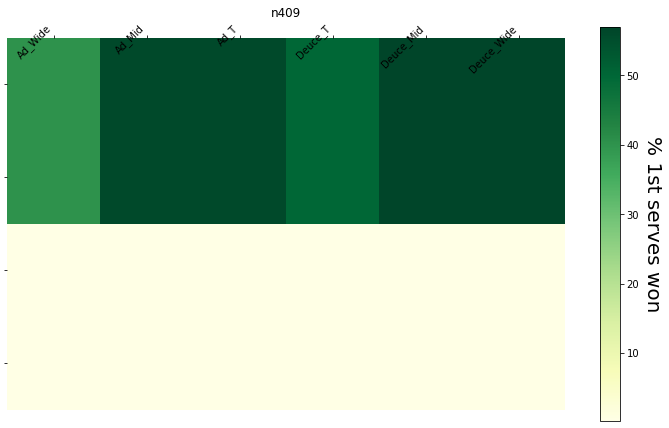

n409


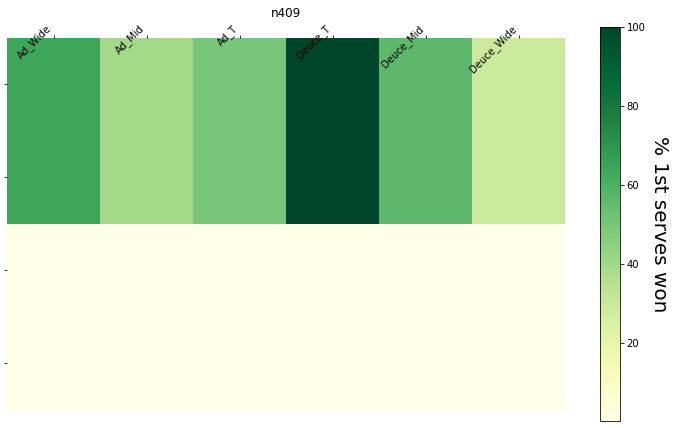

n409


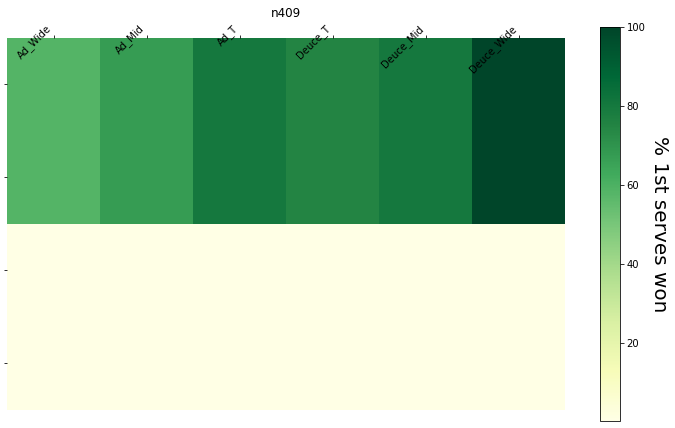

N771


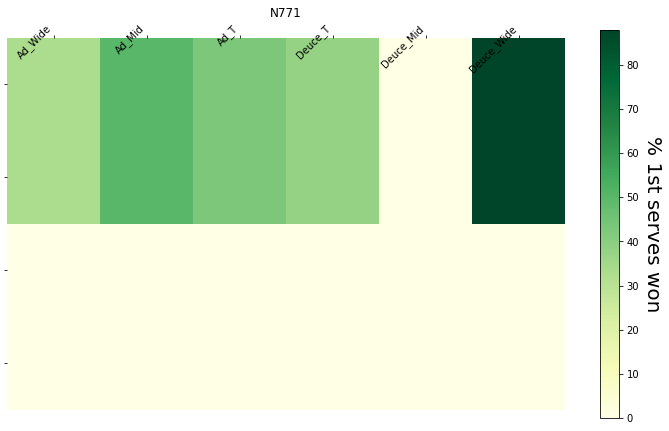

RE44


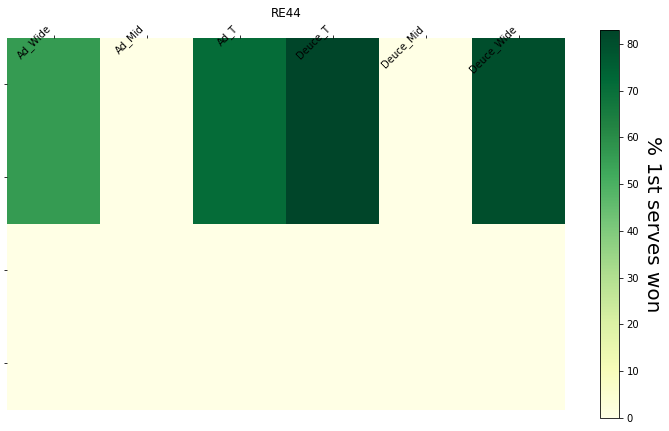

RH16


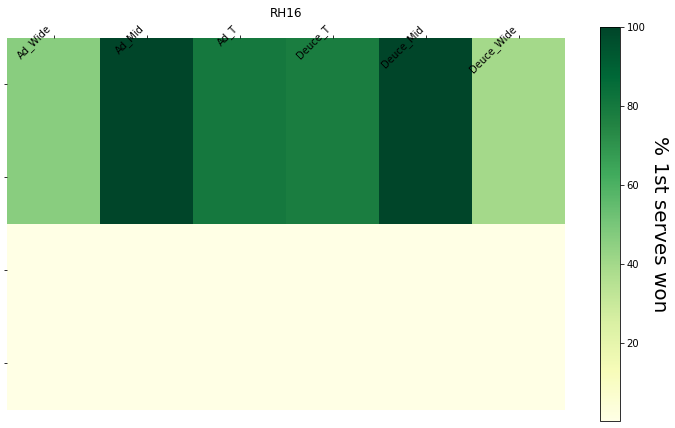

RH16


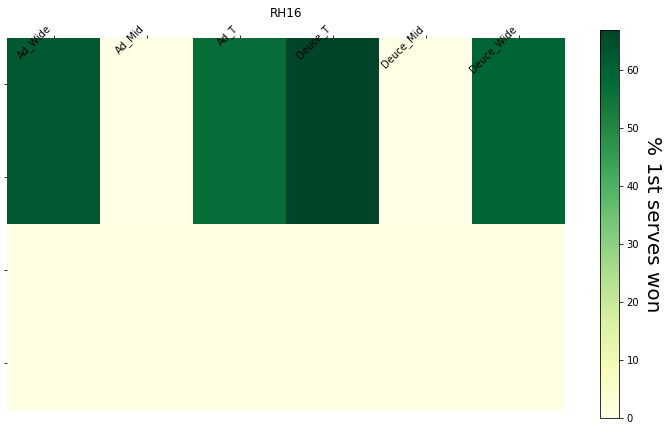

A678


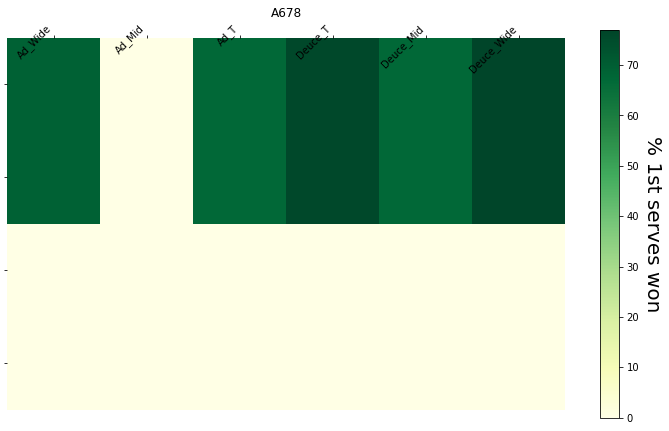

A678


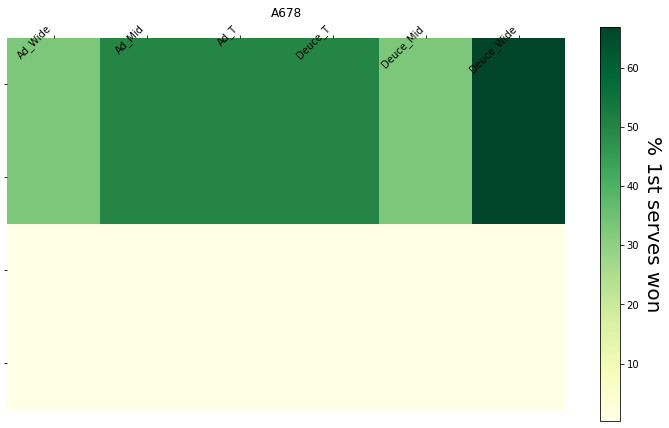

A678


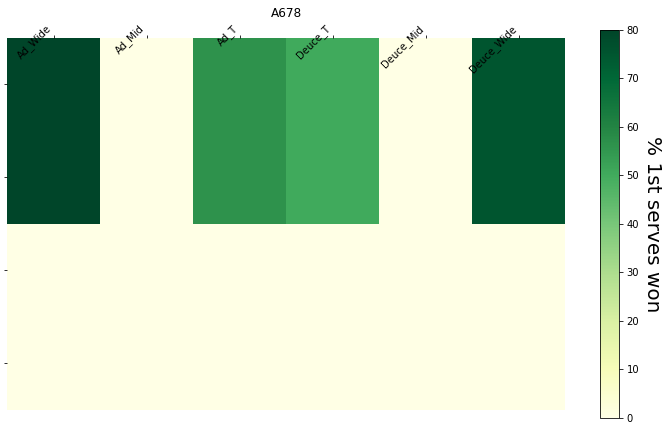

BD06


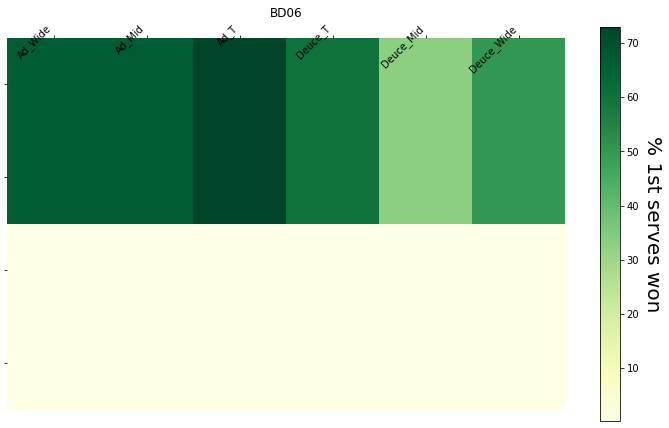

BD06


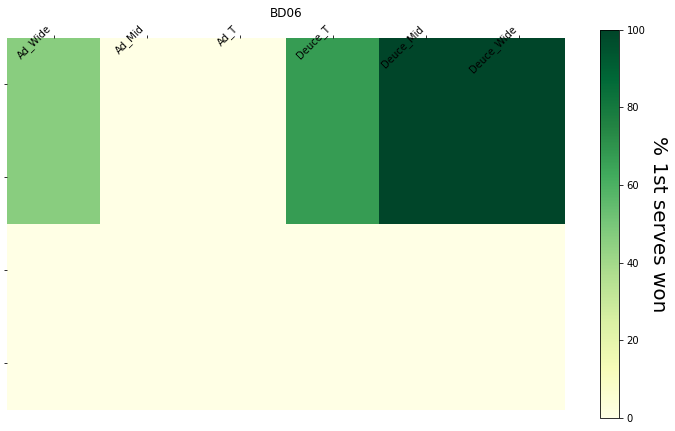

BD06


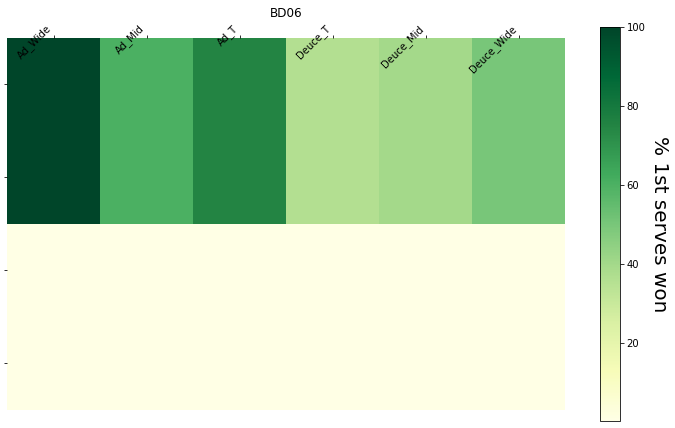

BD06


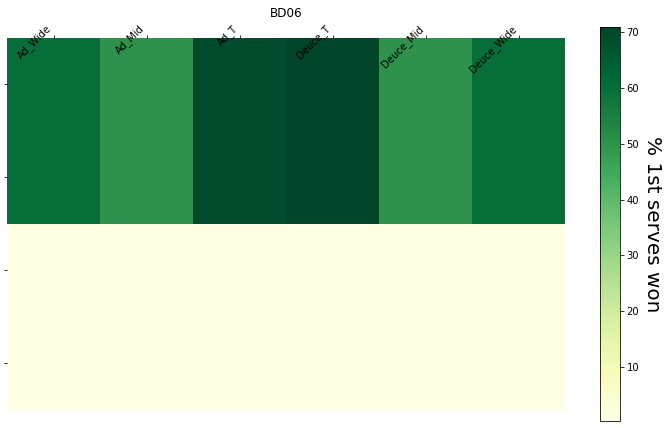

BE90


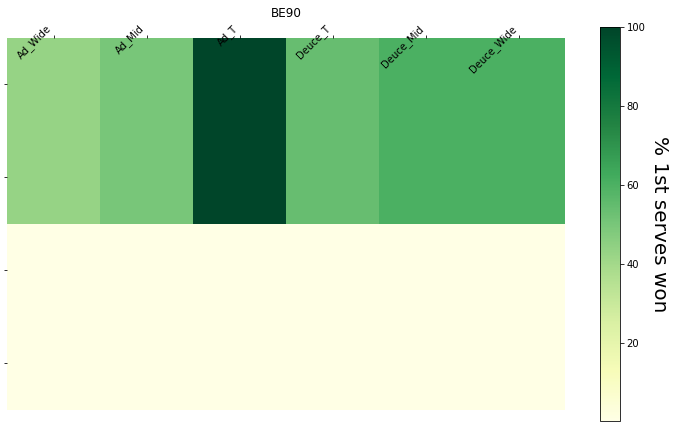

CE25


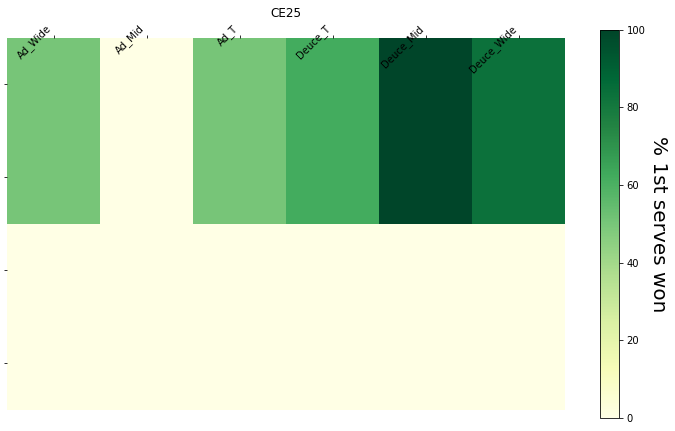

CG80


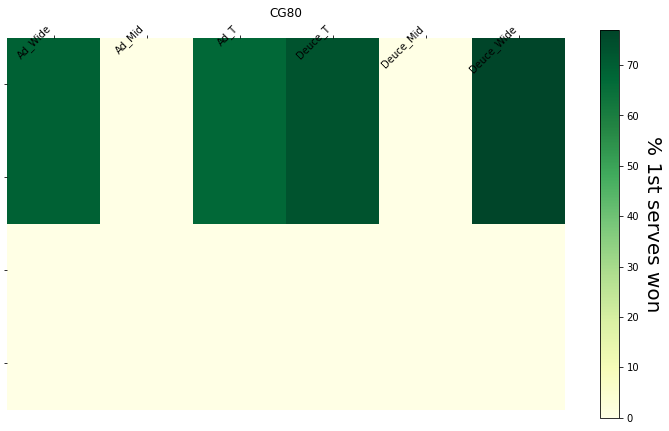

CG80


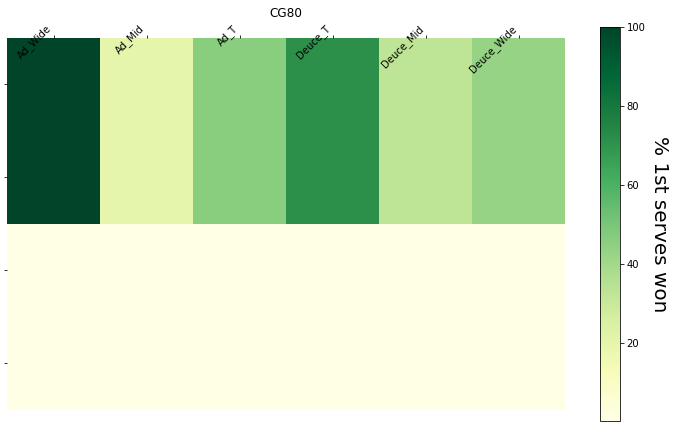

CG80


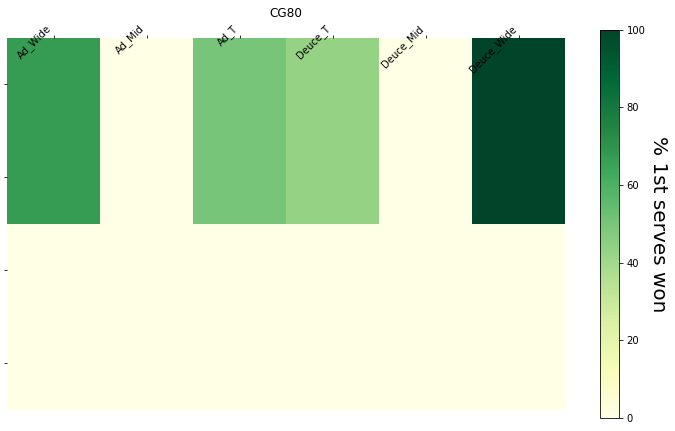

GD64


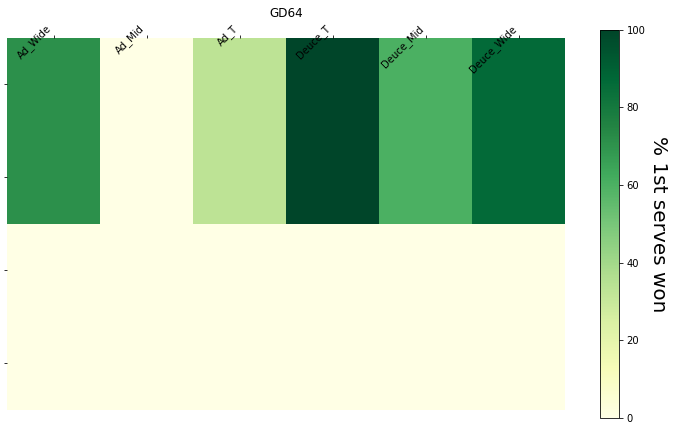

J267


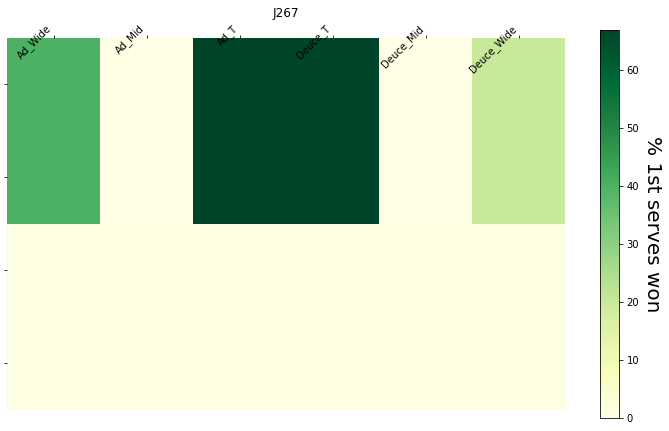

KE29


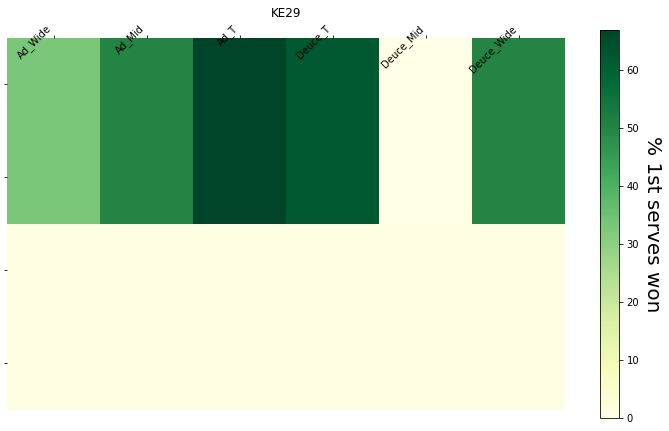

KE29


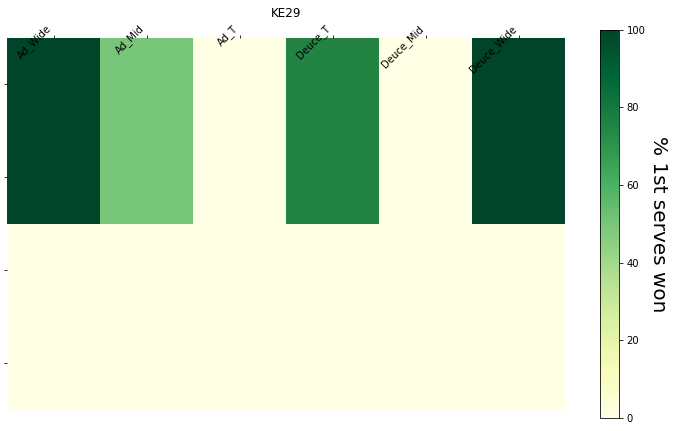

KE73


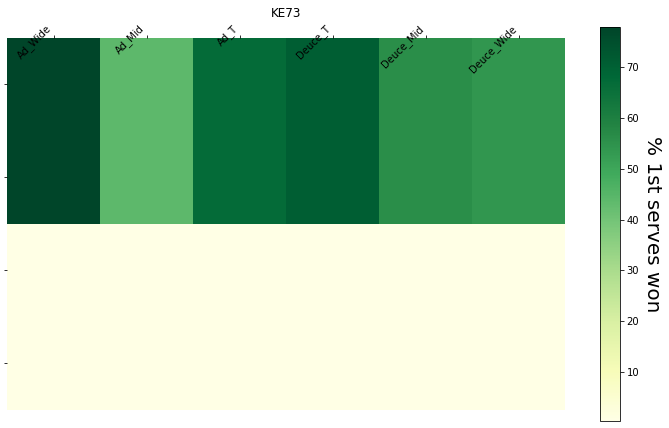

K435


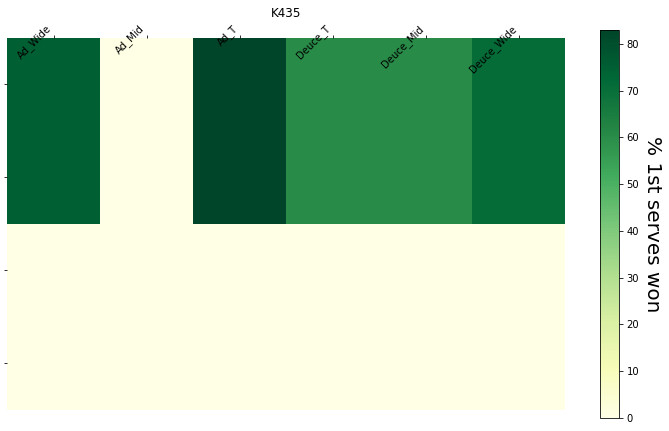

K435


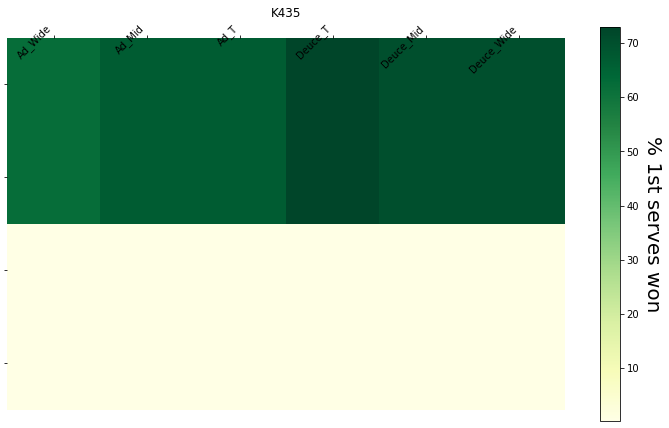

K435


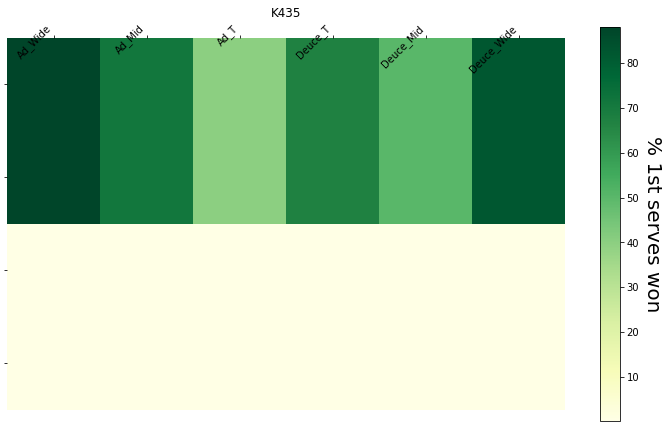

K435


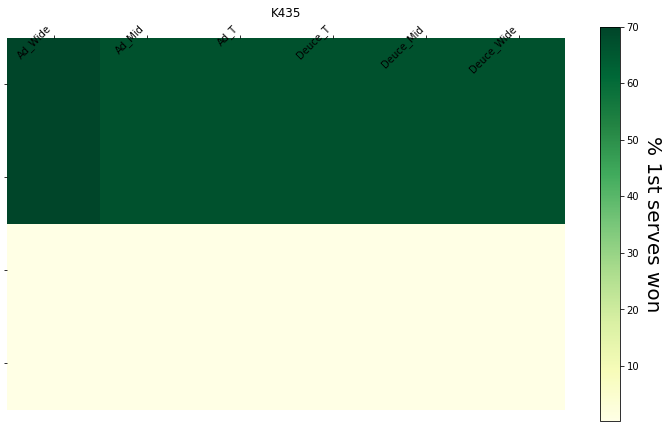

KB05


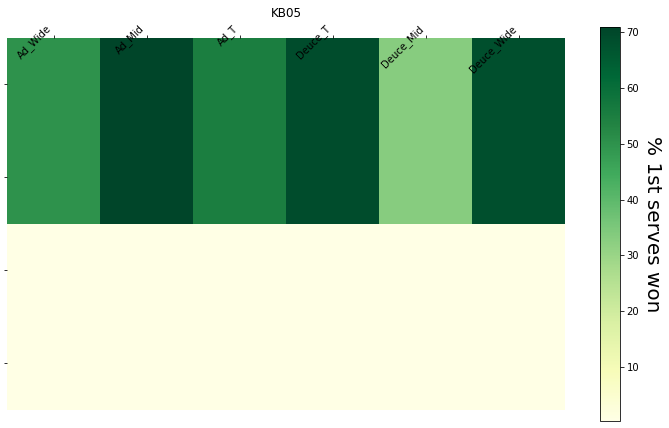

MC65


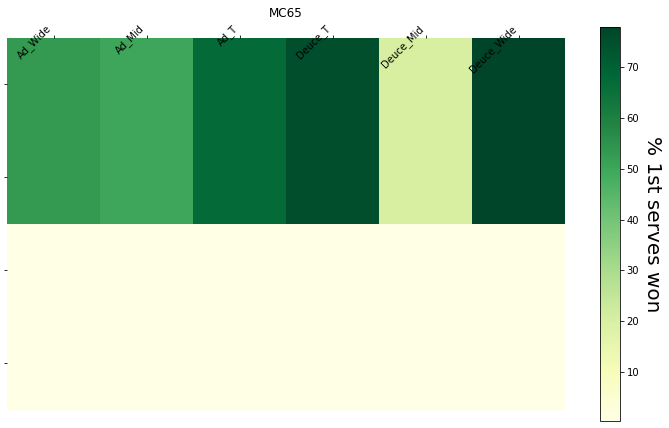

MC65


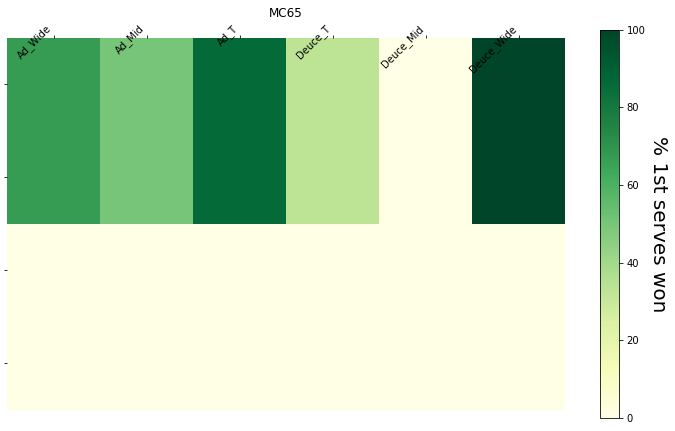

MC65


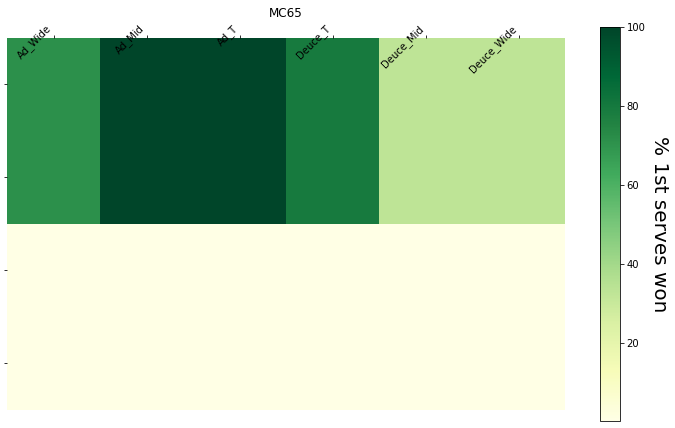

r975


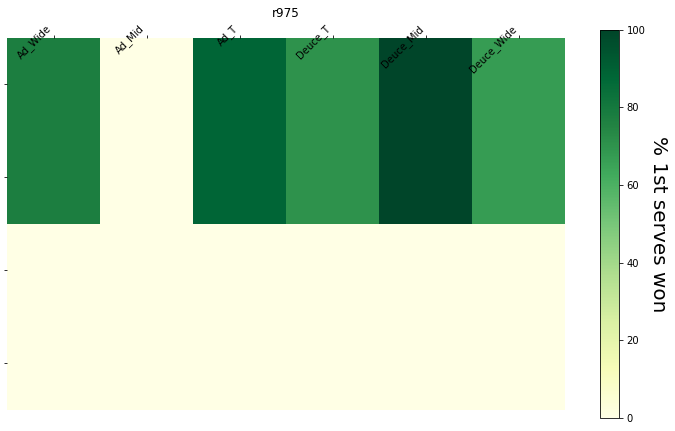

r975


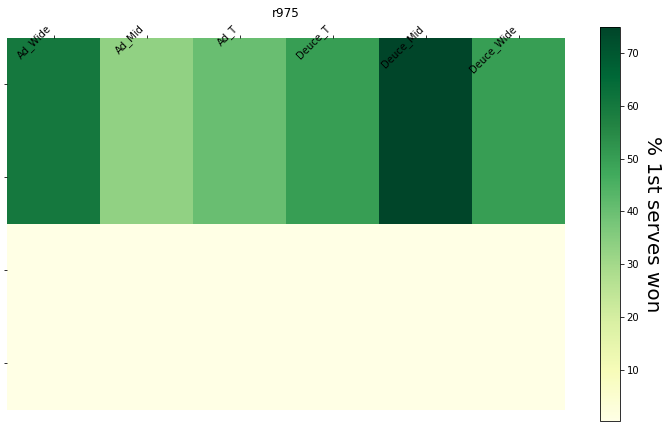

r975


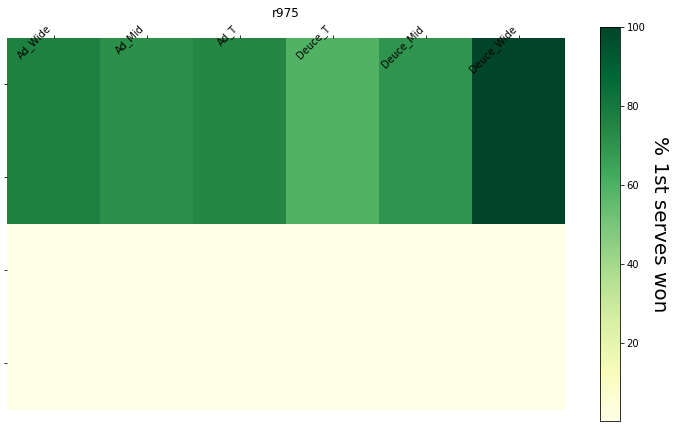

r975


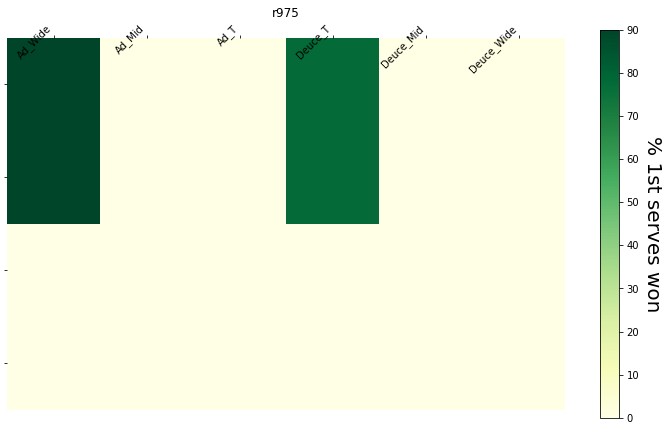

BK40


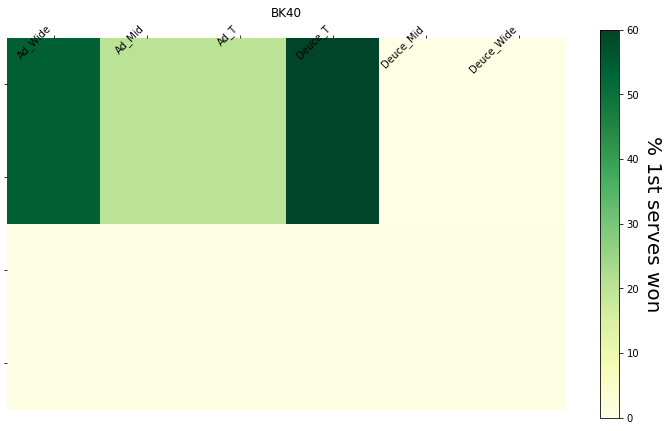

CD85


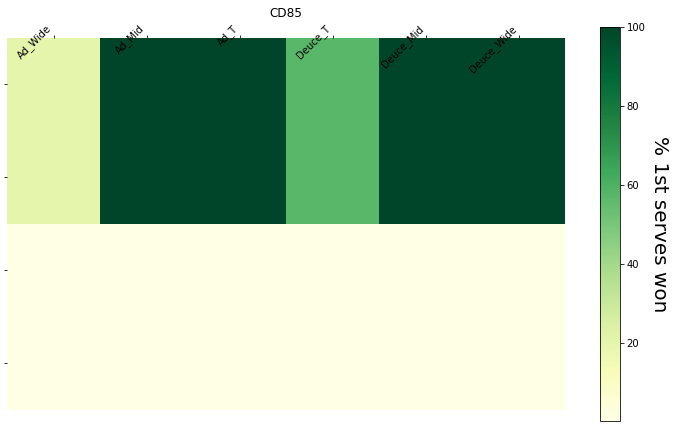

CD85


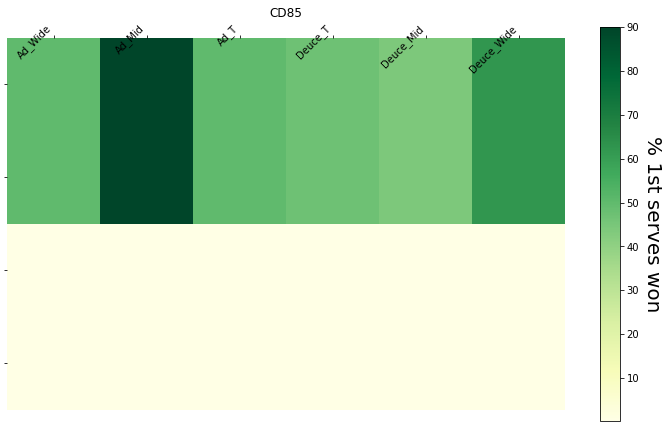

CA12


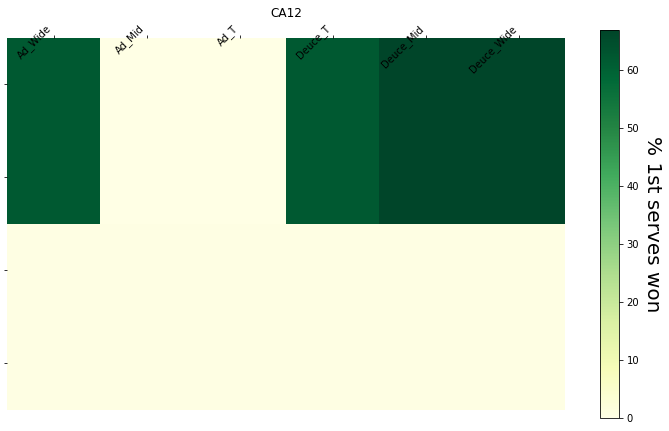

CA12


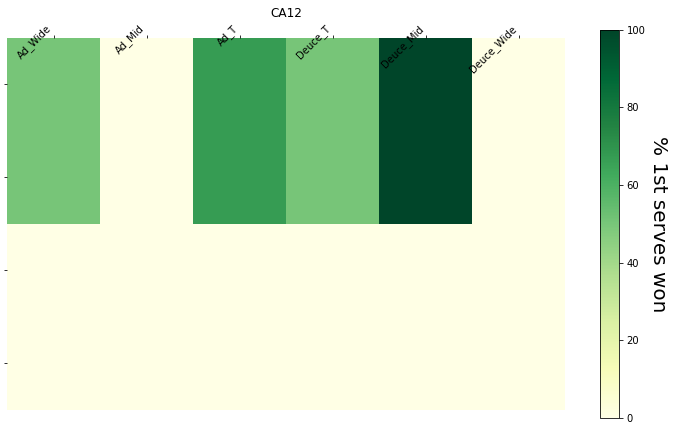

CA12


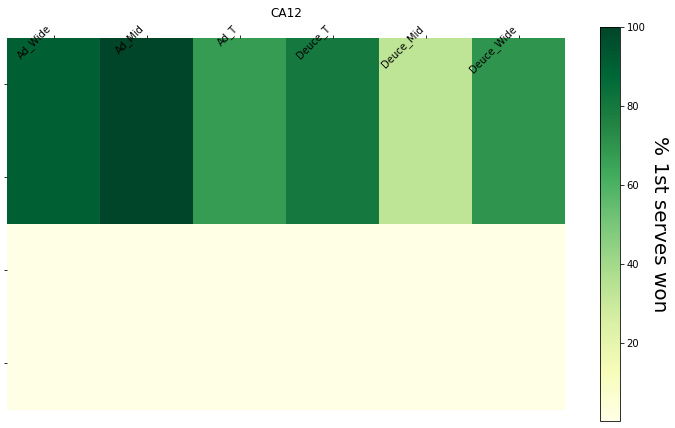

CA12


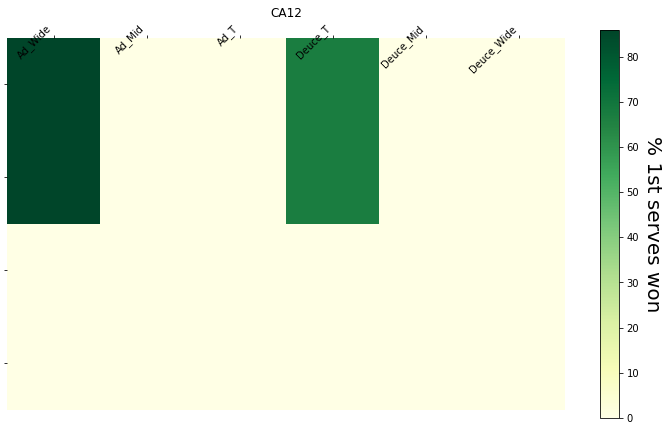

d683


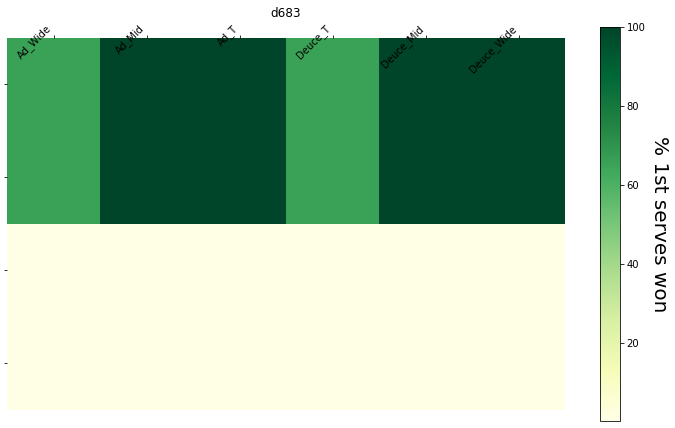

d683


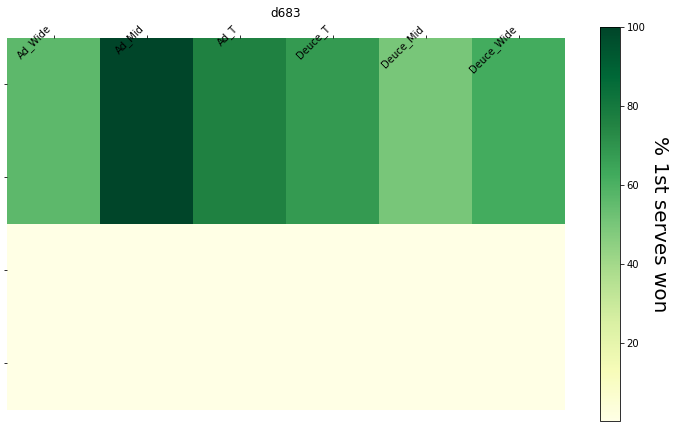

d683


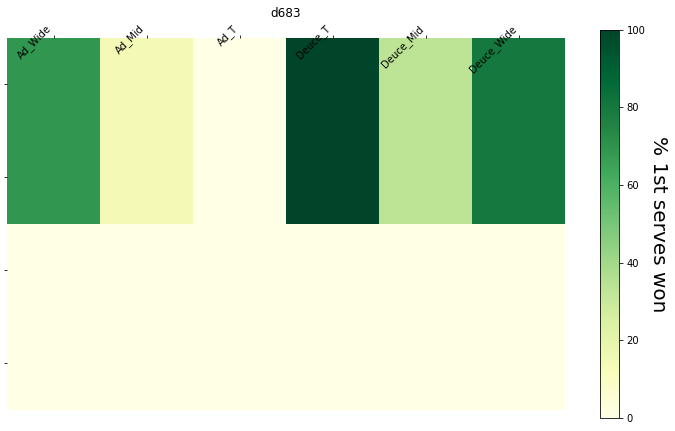

d683


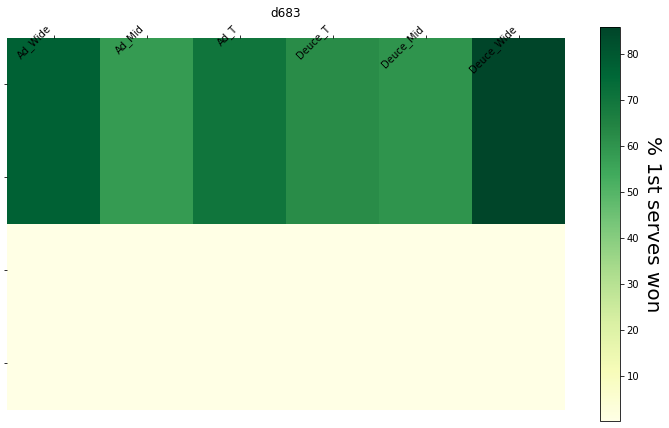

D874


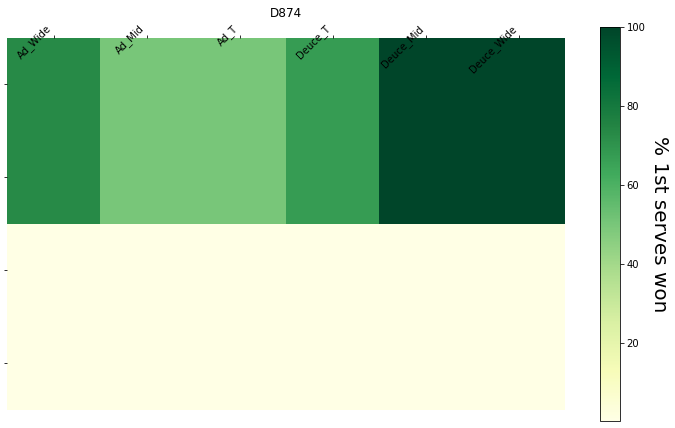

d875


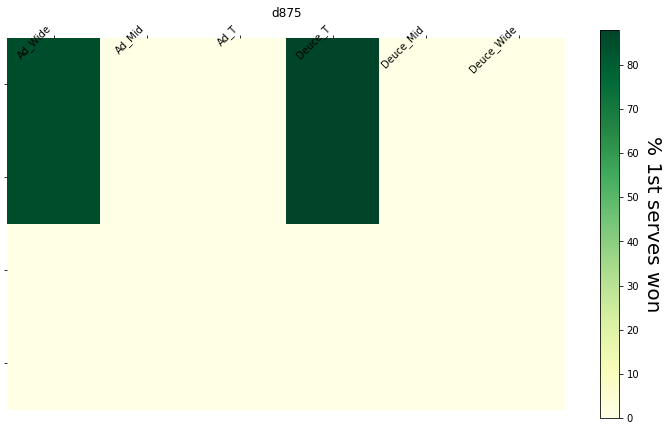

d875


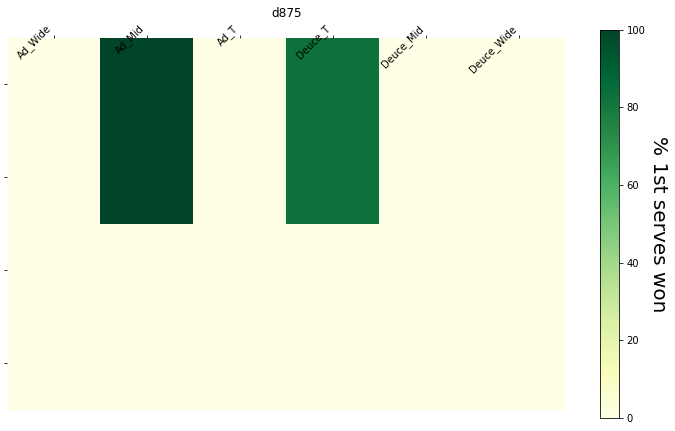

d875


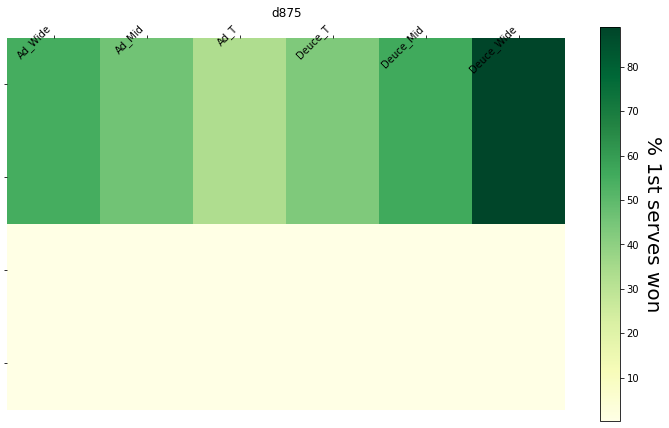

d875


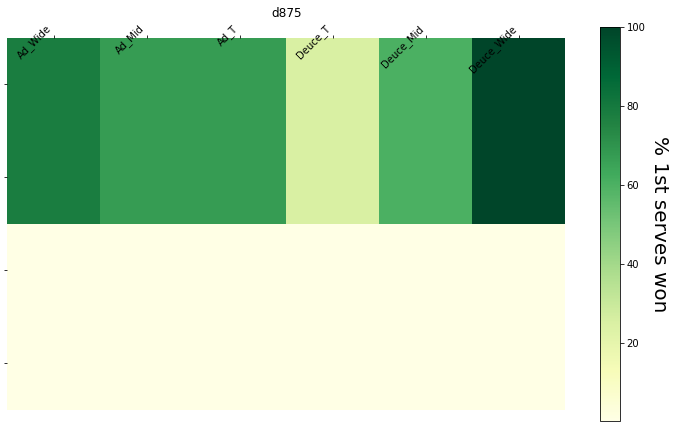

e831


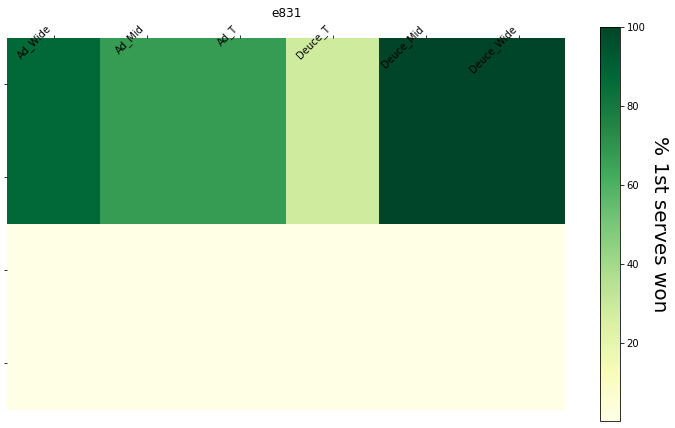

e831


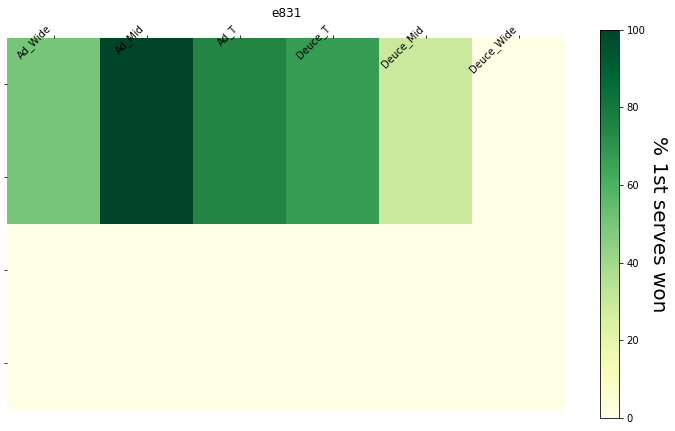

e831


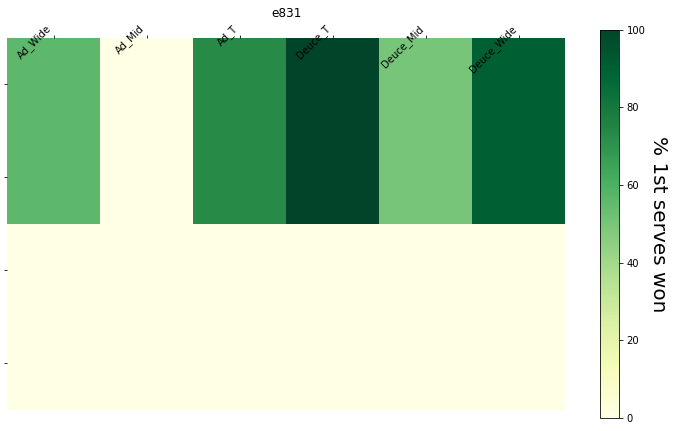

e831


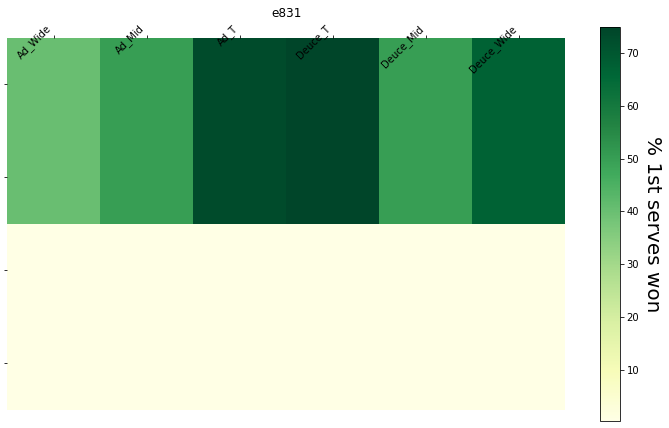

F324


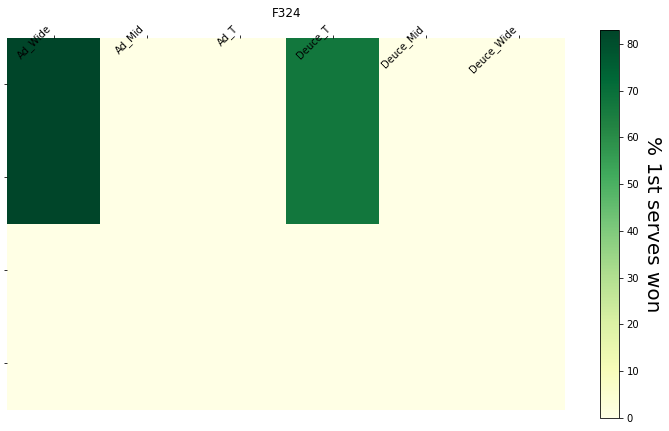

F324


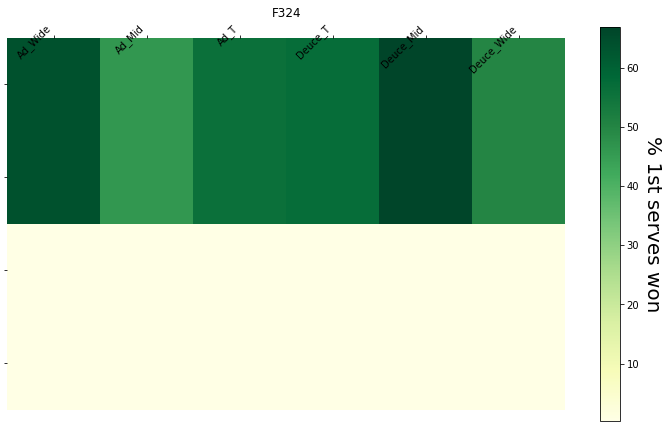

F324


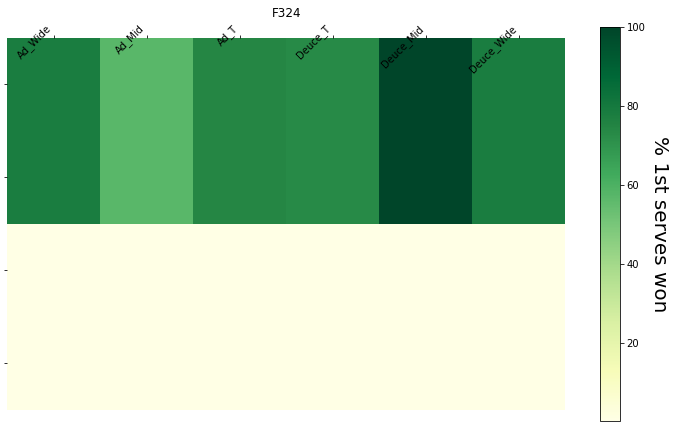

F324


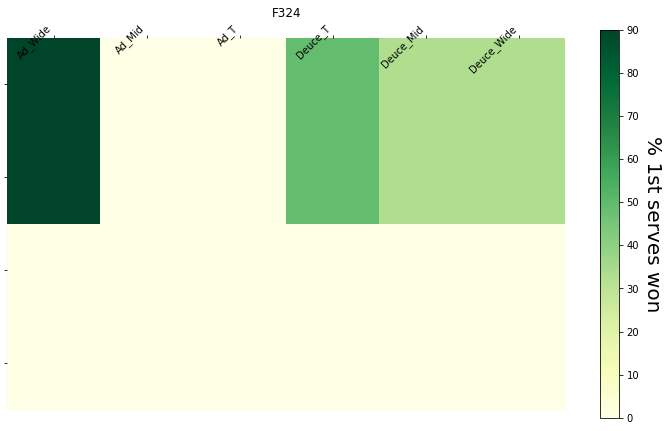

F324


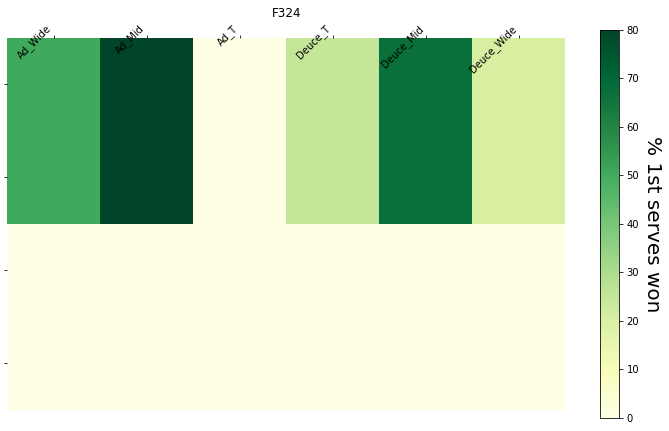

F324


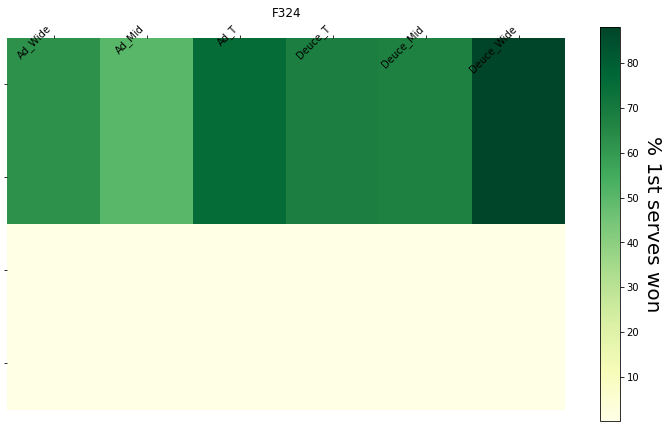

F811


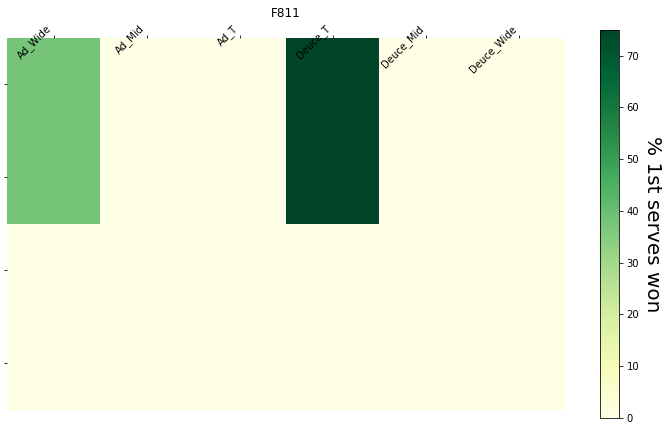

F811


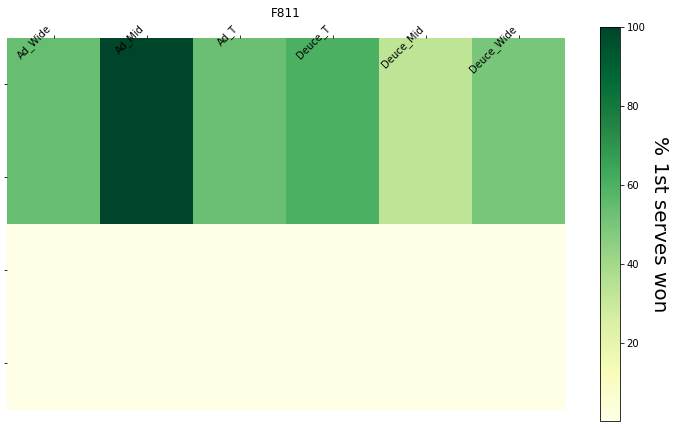

i186


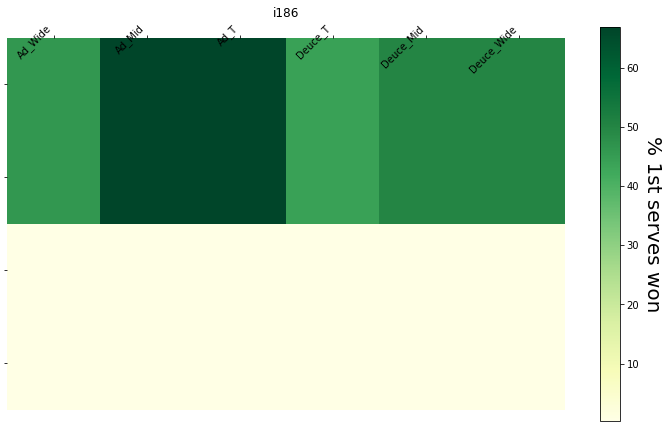

i186


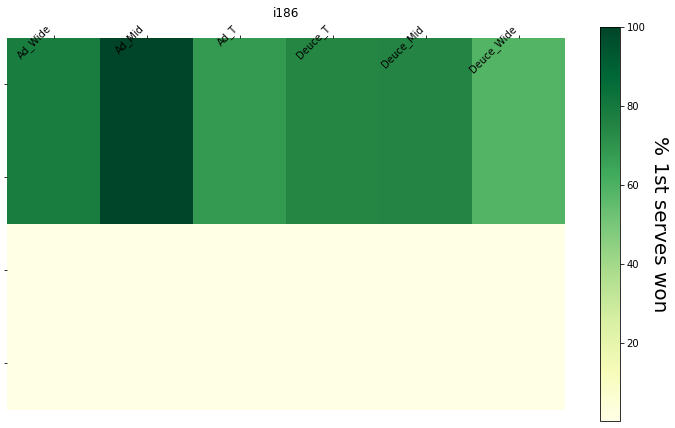

i186


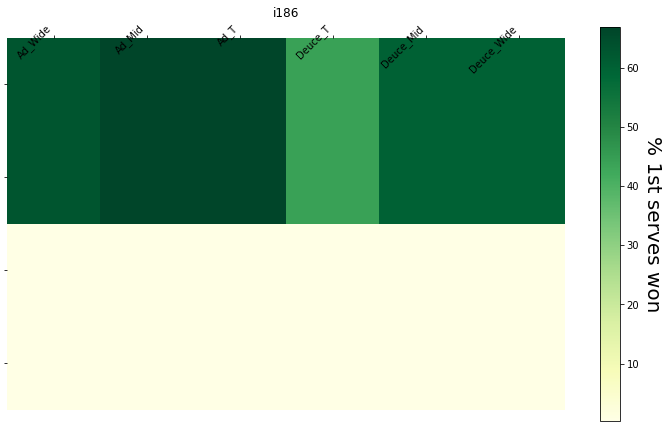

i186


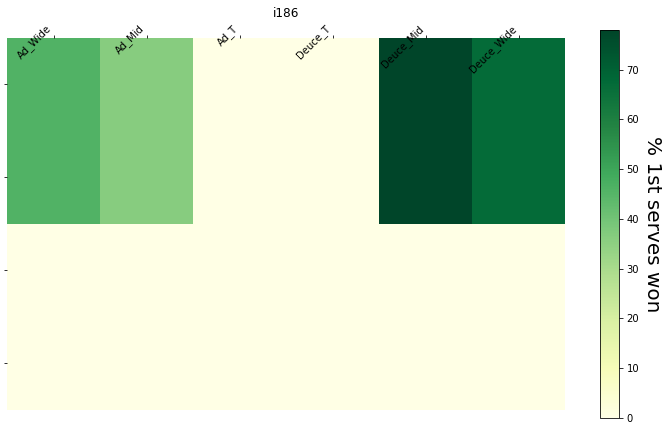

i186


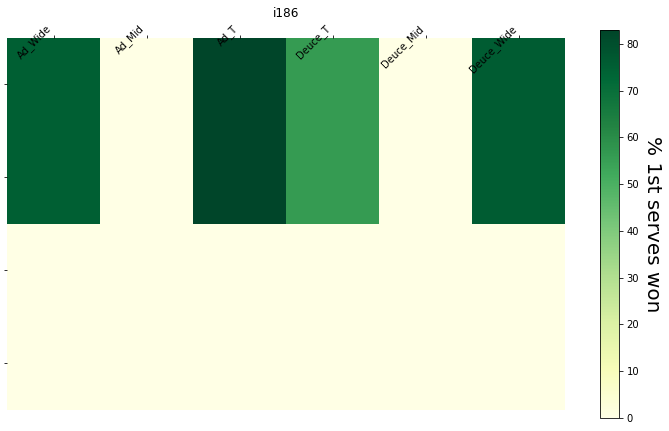

MW02


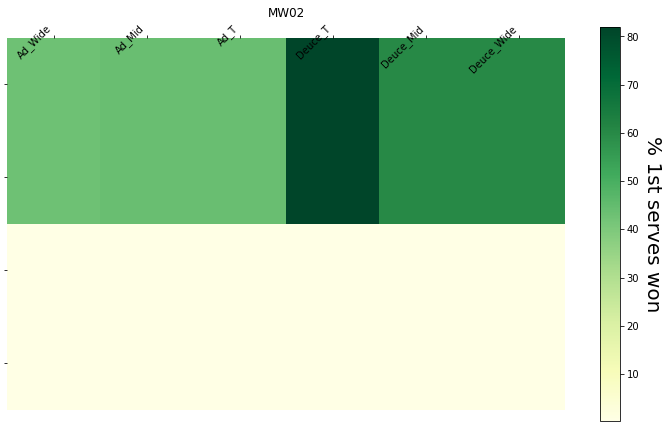

PF39


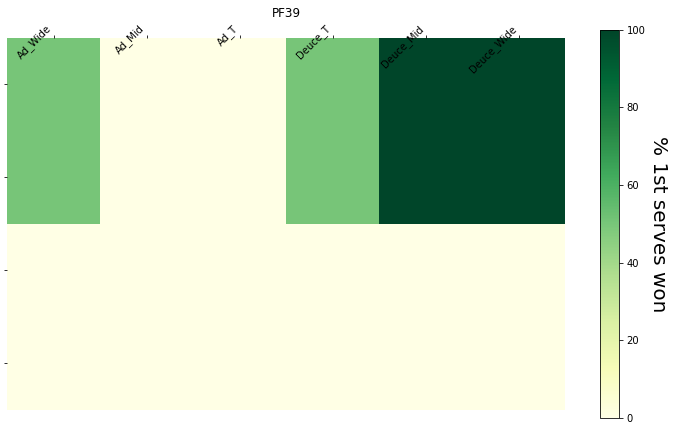

Q927


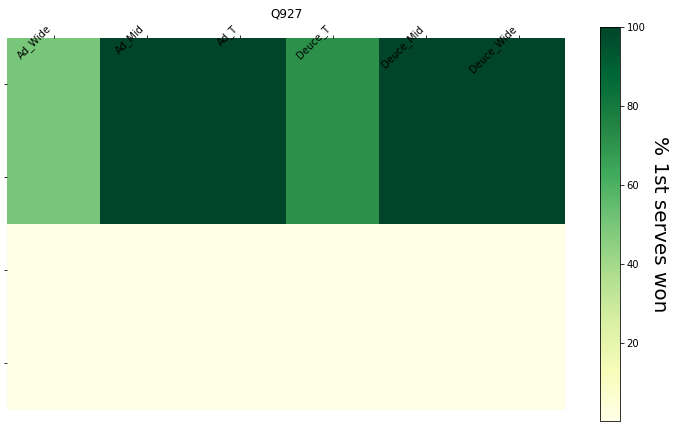

Q927


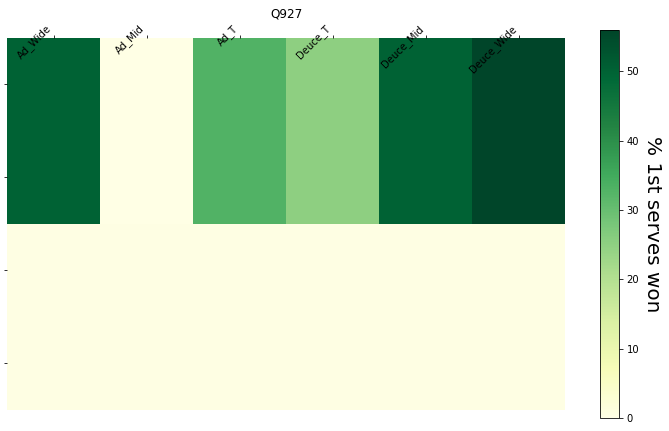

Q927


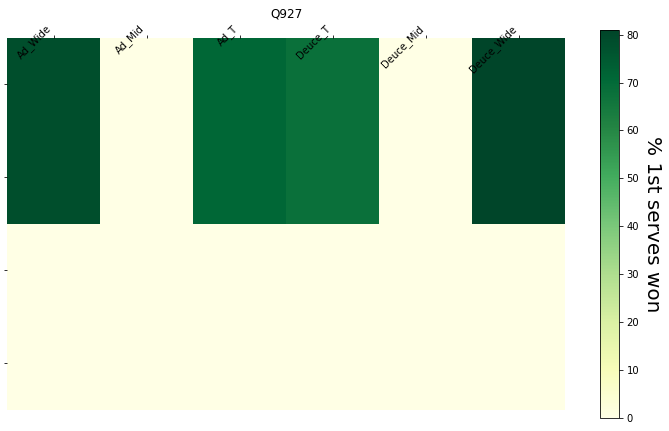

be67


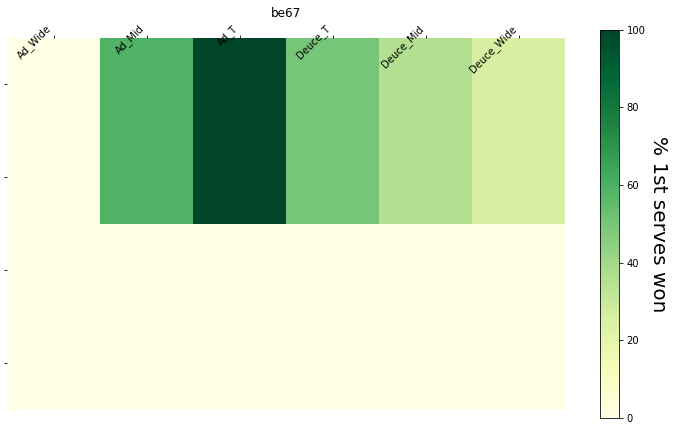

cf01


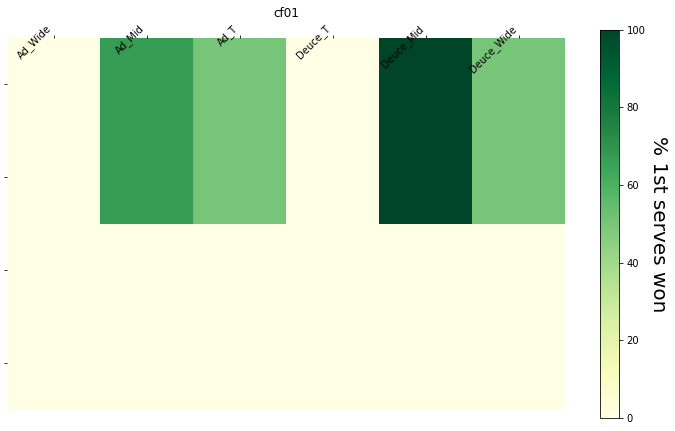

c977


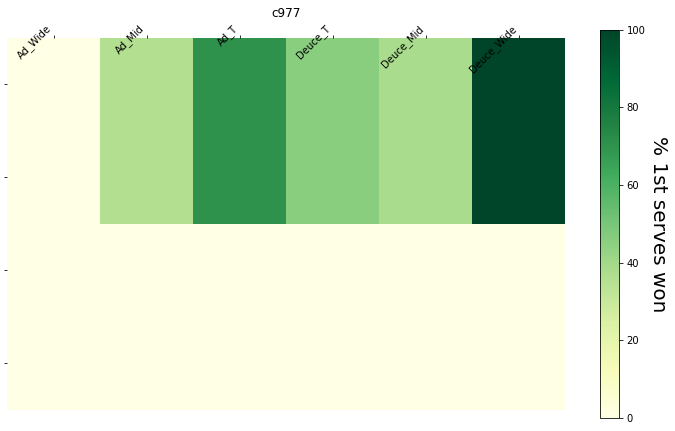

c977


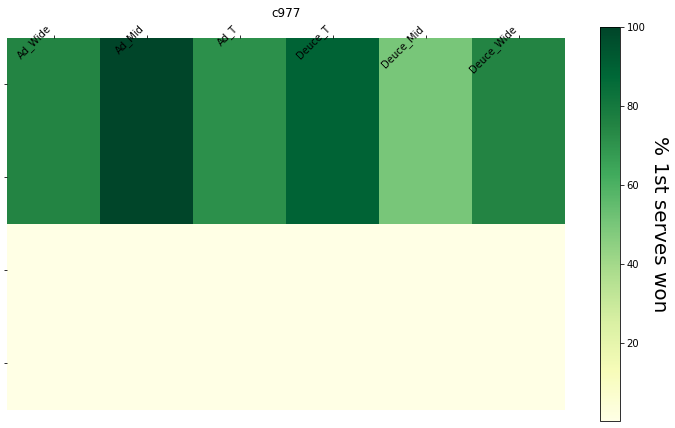

c977


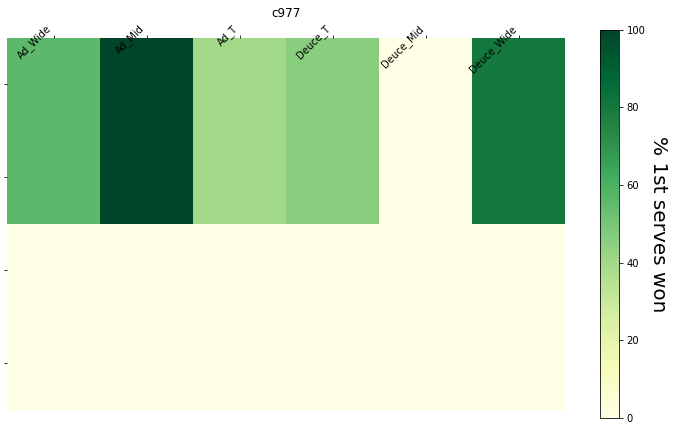

c977


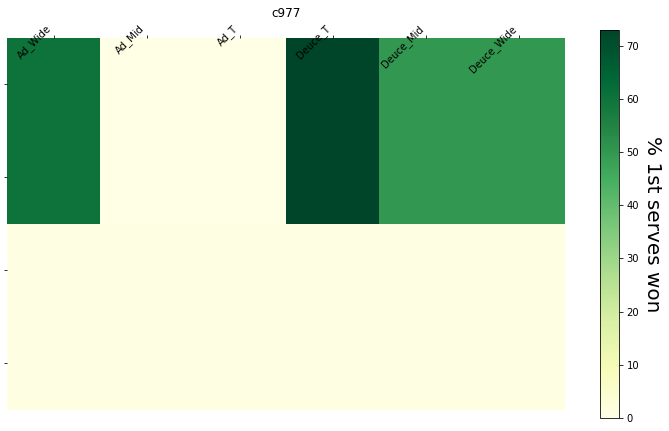

c977


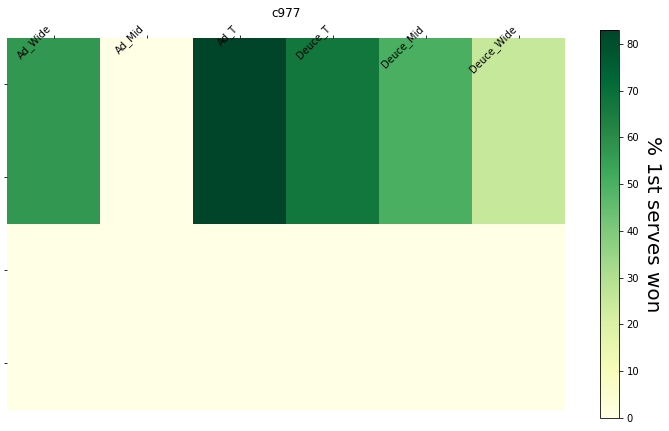

da81


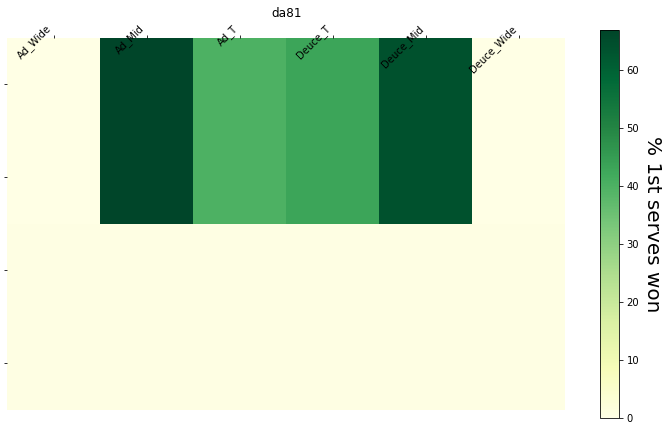

d923


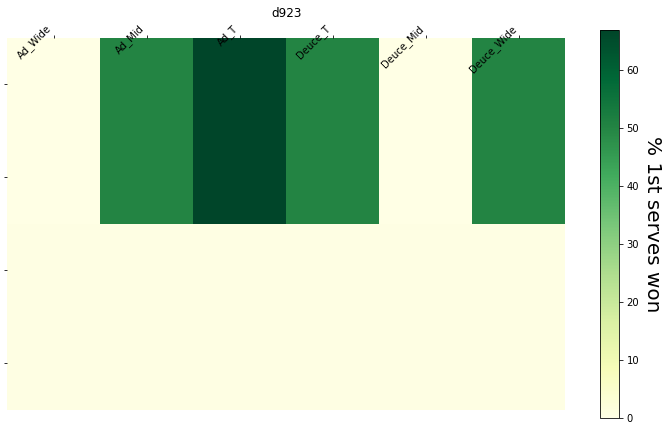

J386


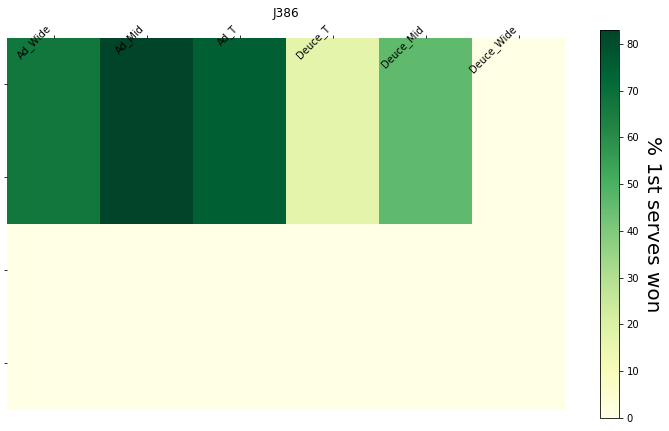

L987


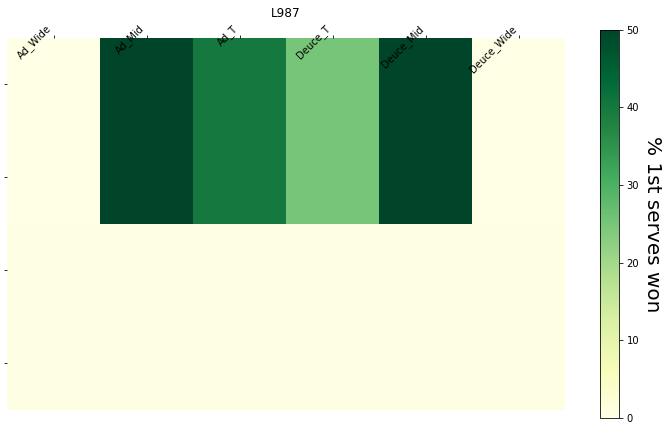

ME82


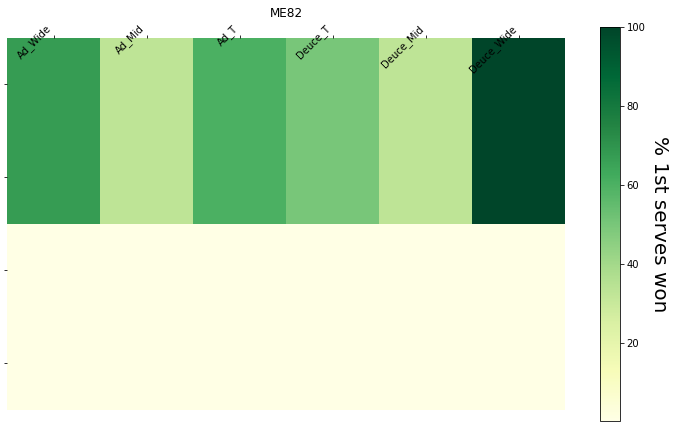

pb22


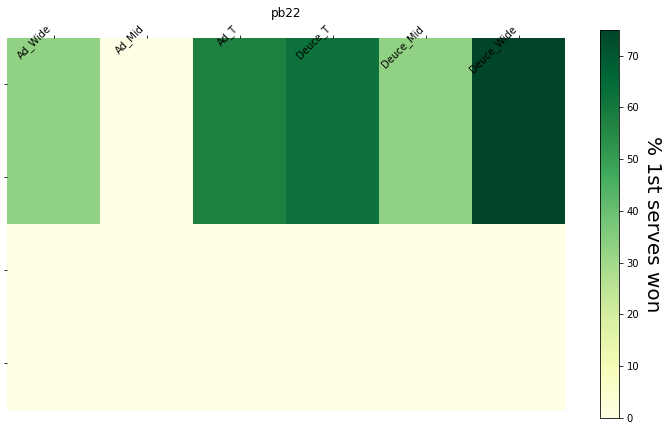

A479


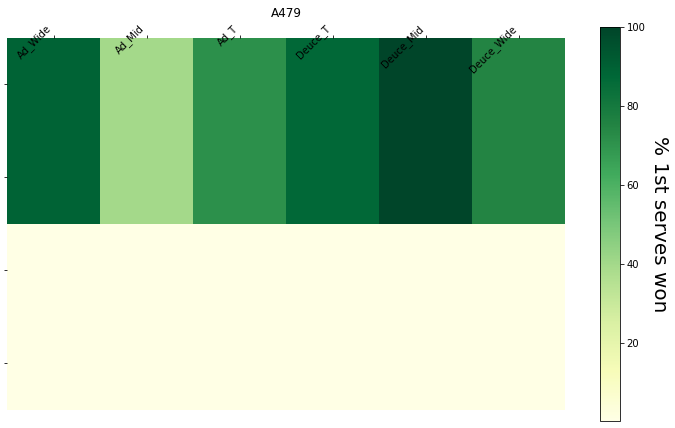

A479


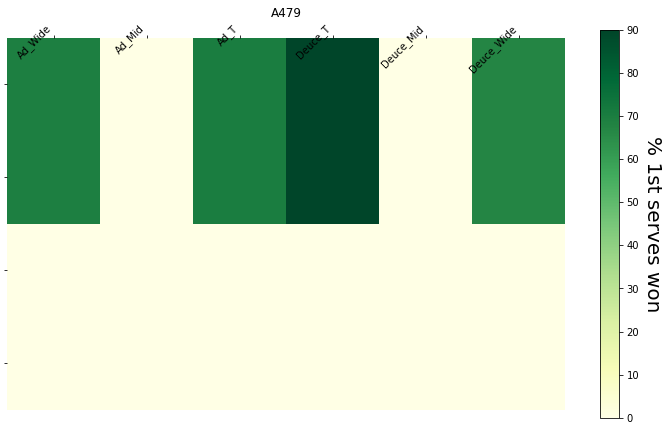

A479


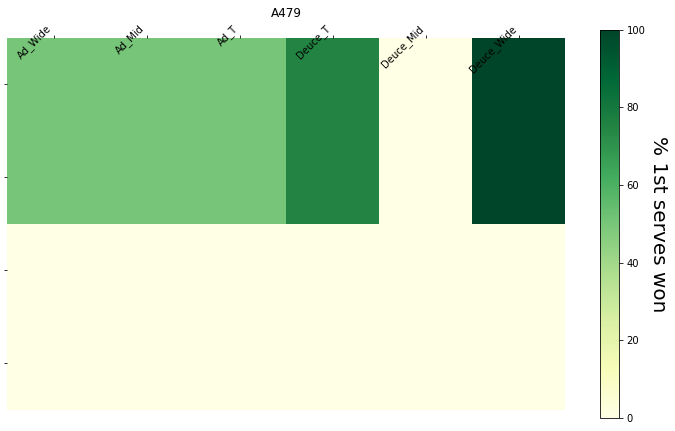

bh09


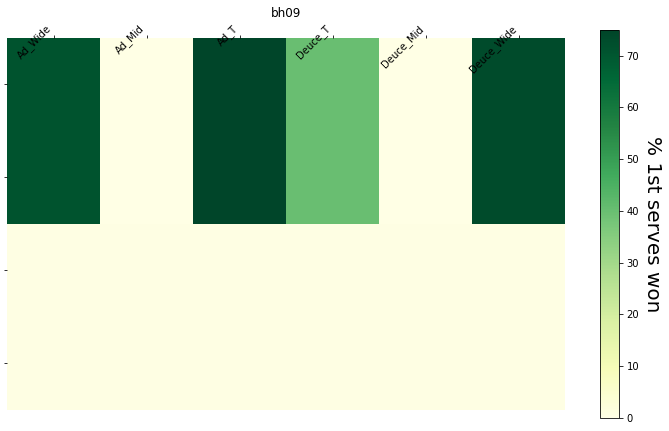

gb88


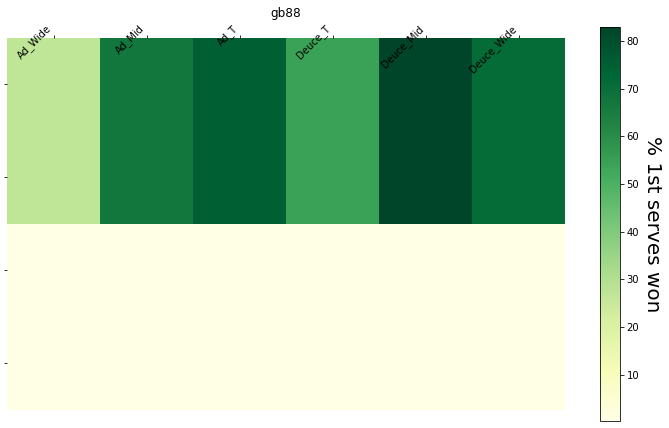

gb88


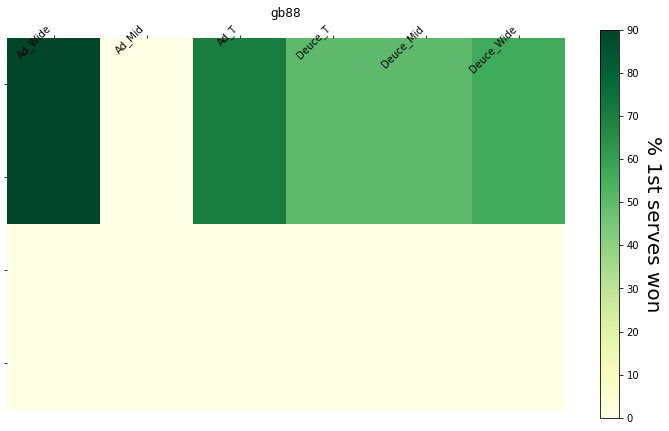

gb88


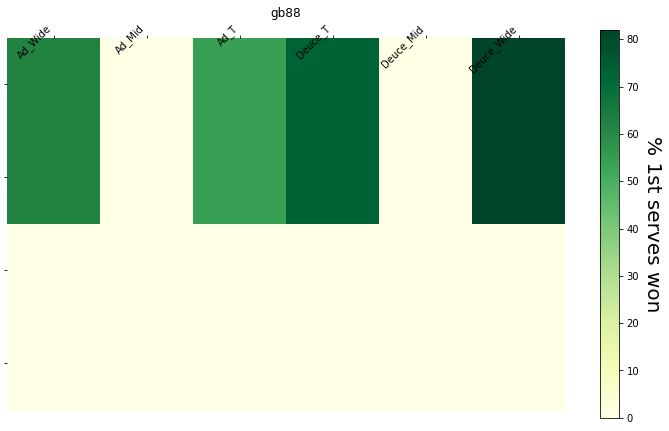

gb88


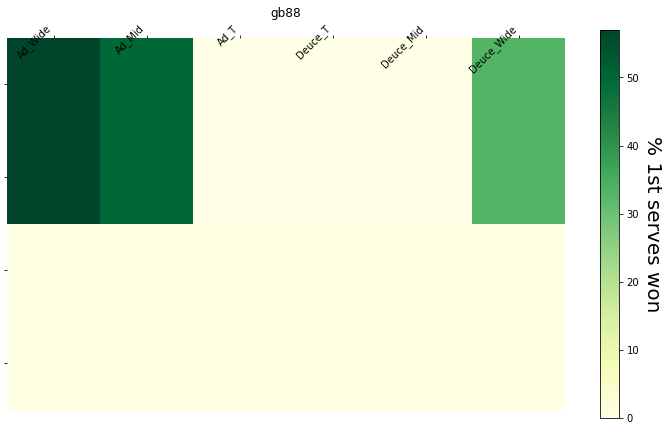

ke17


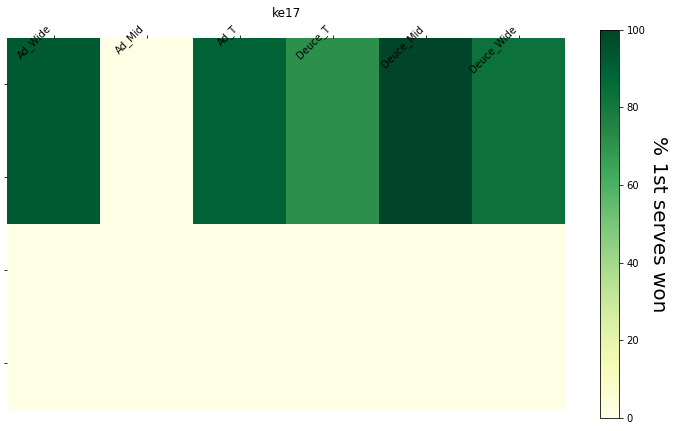

l397


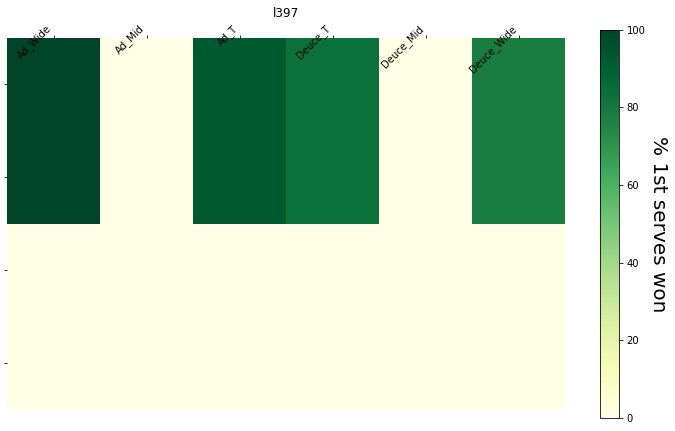

l397


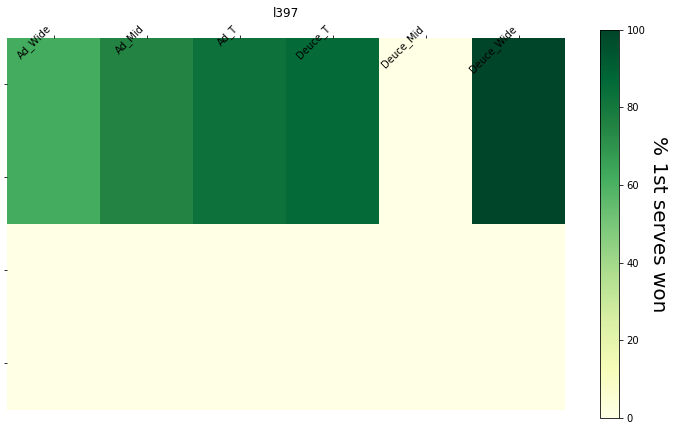

l397


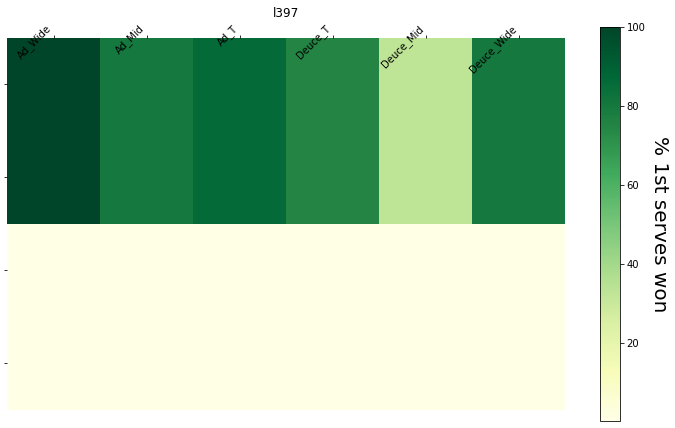

bd20


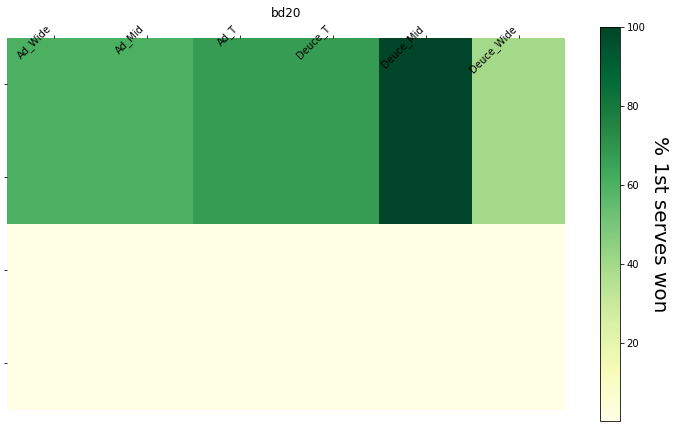

bd20


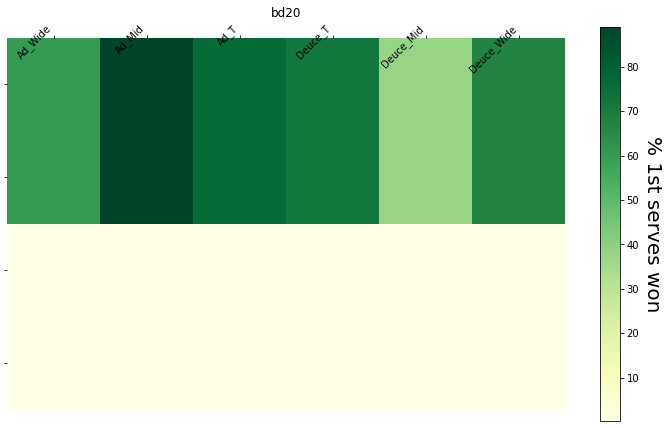

BA47


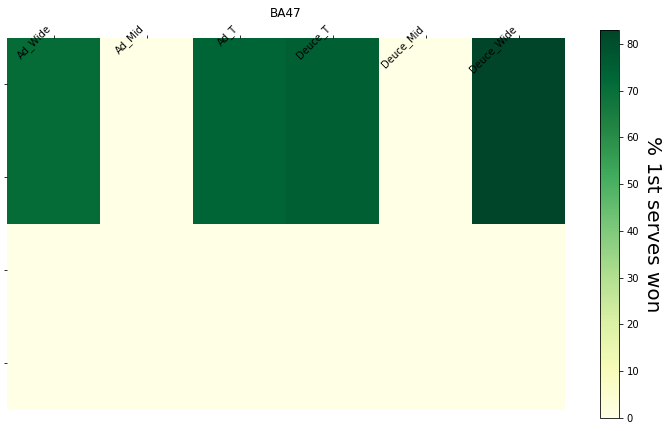

BA47


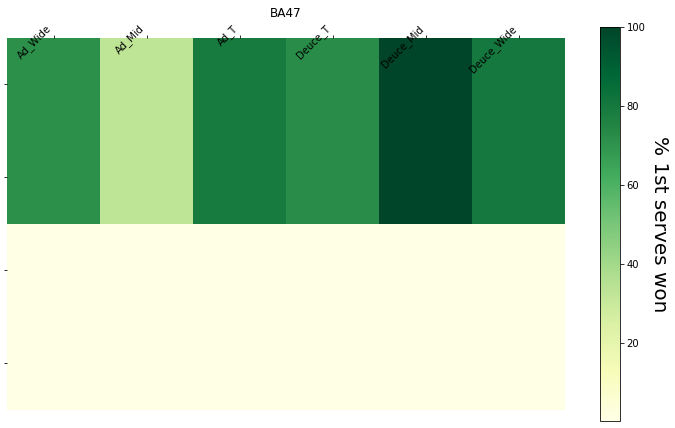

BA47


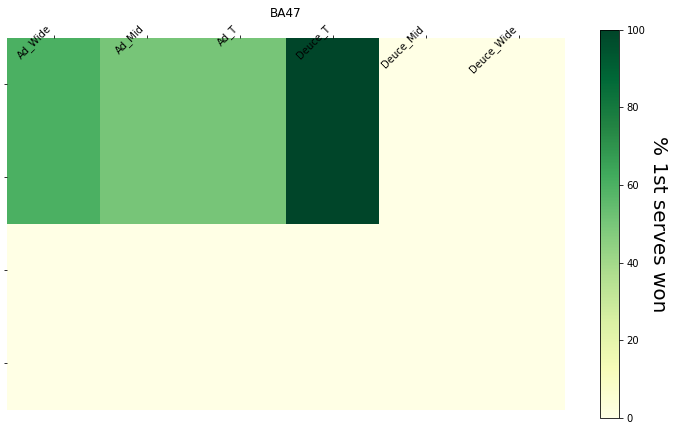

BA47


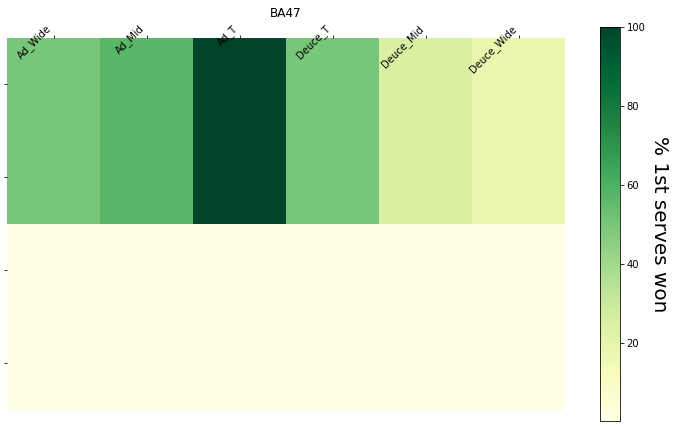

BA47


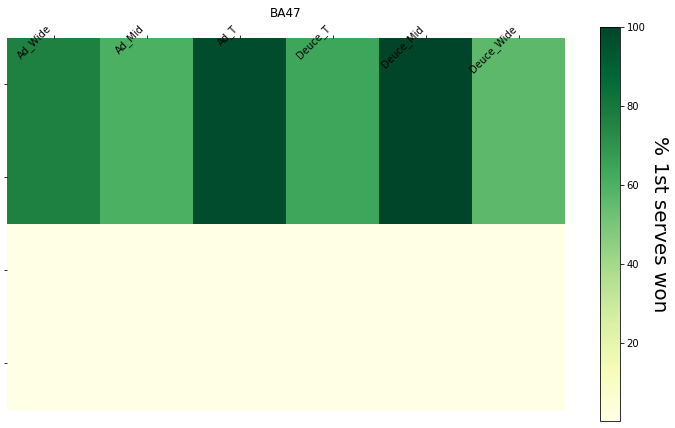

F510


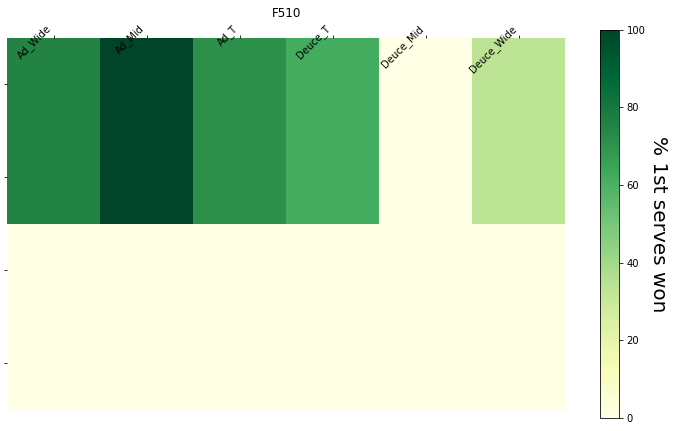

F510


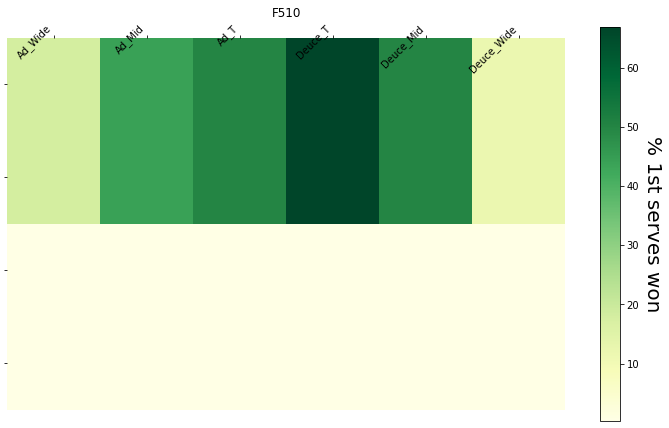

MA30


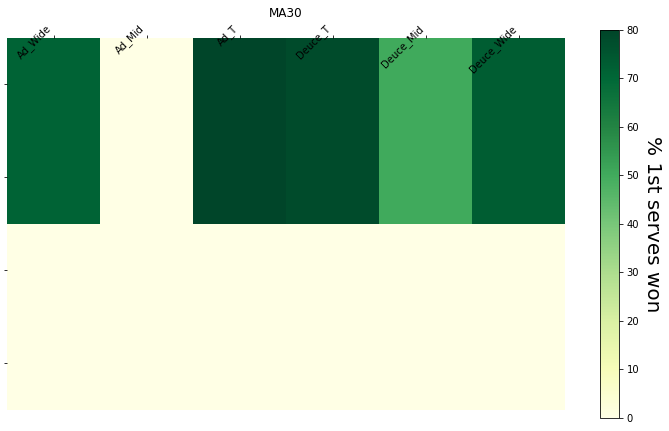

mc10


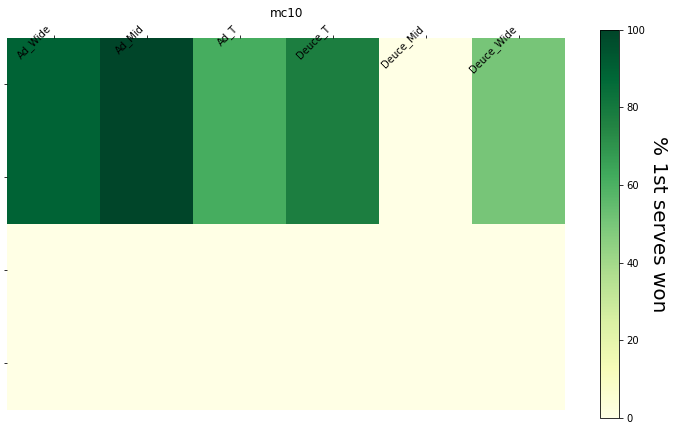

mc10


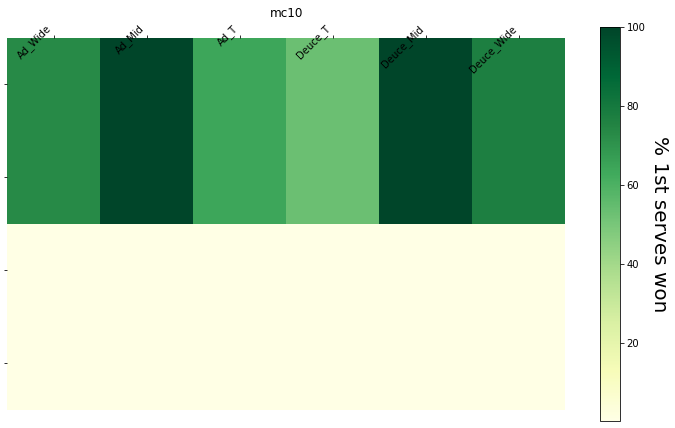

mc10


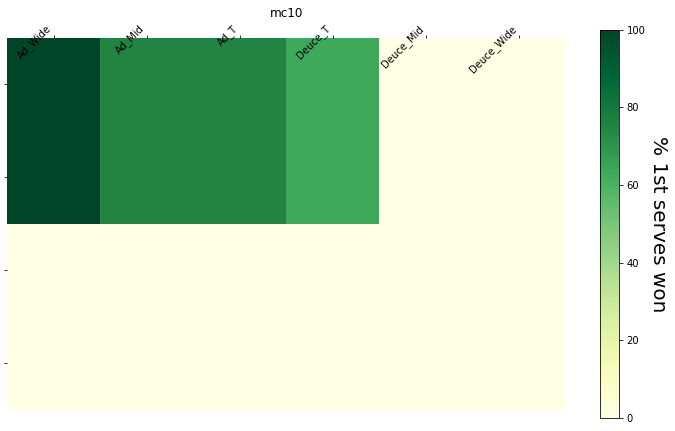

mc10


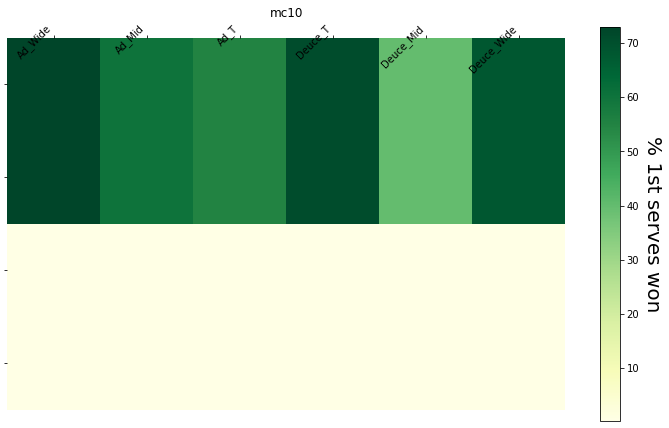

N552


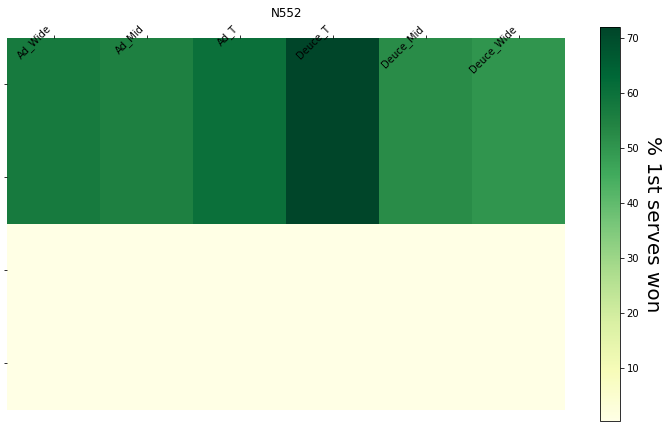

N552


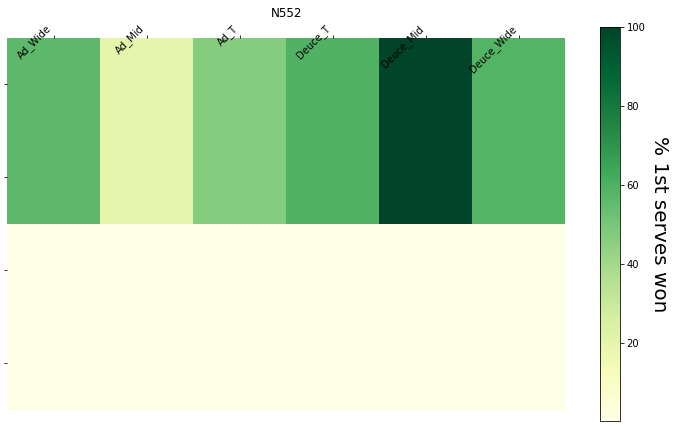

N552


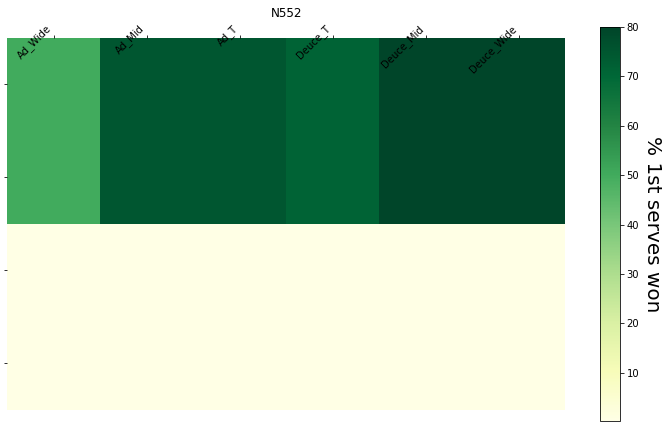

PD07


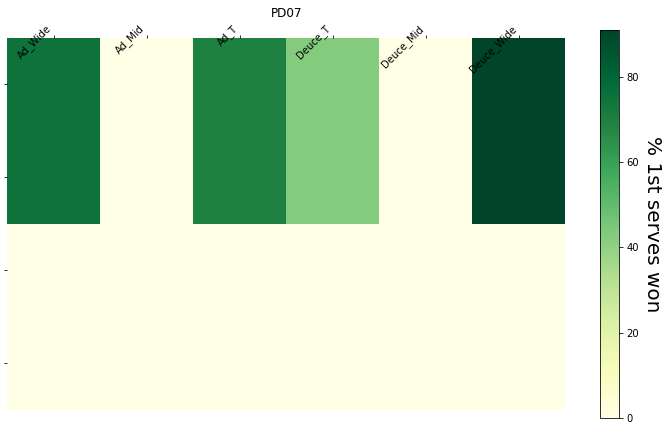

R612


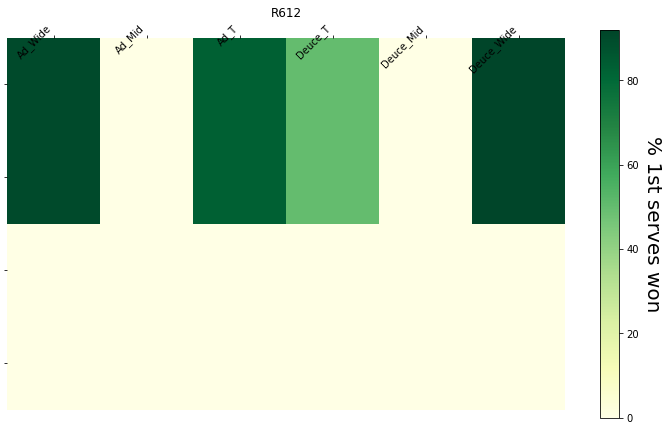

B837


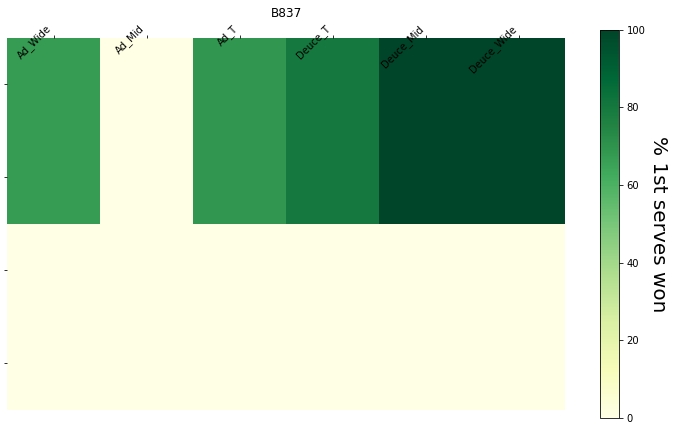

B837


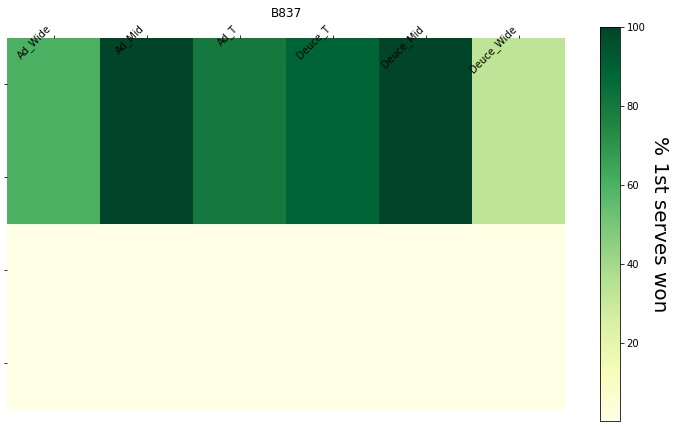

D801


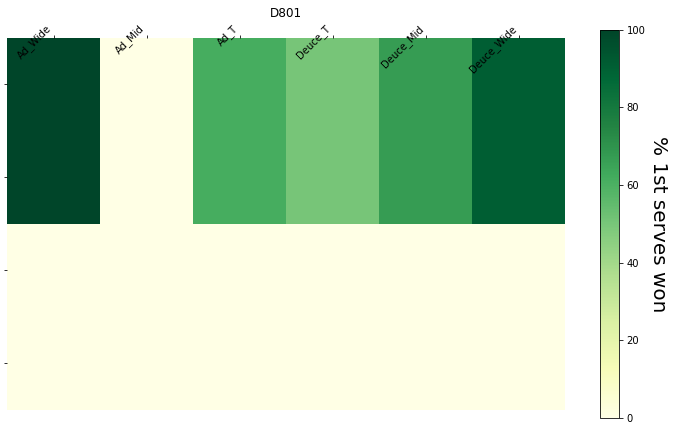

D801


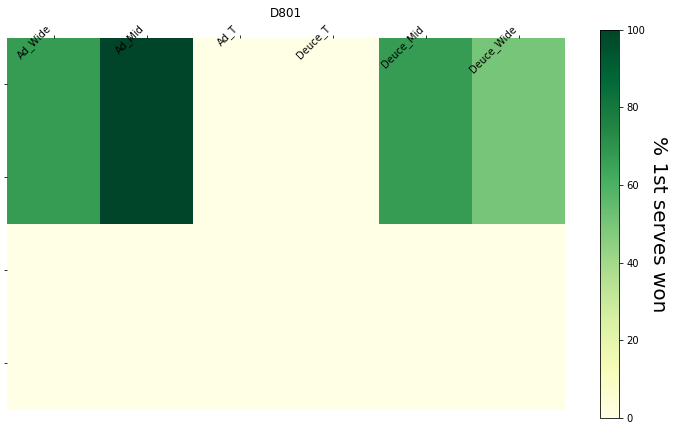

D801


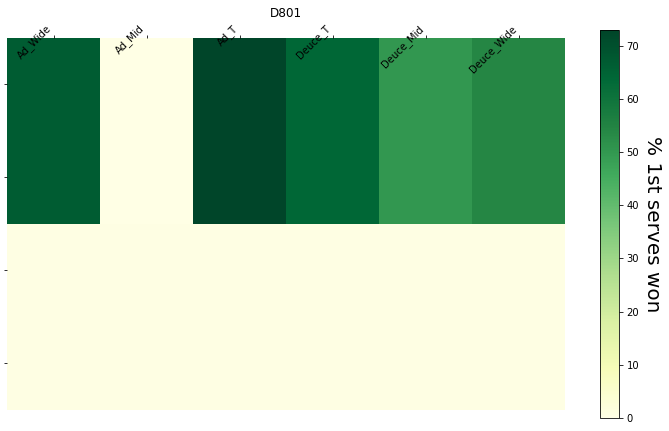

f401


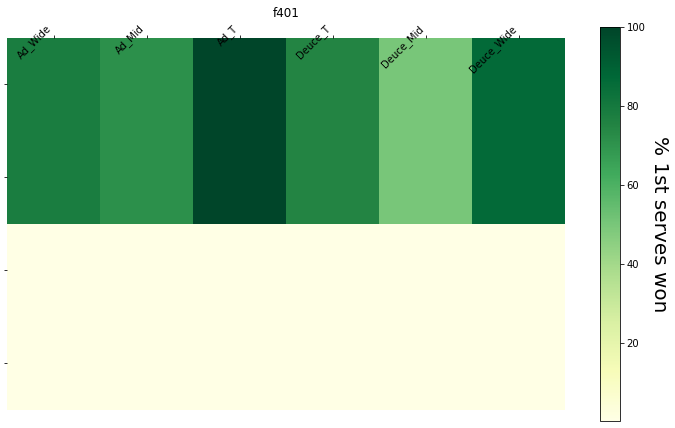

f401


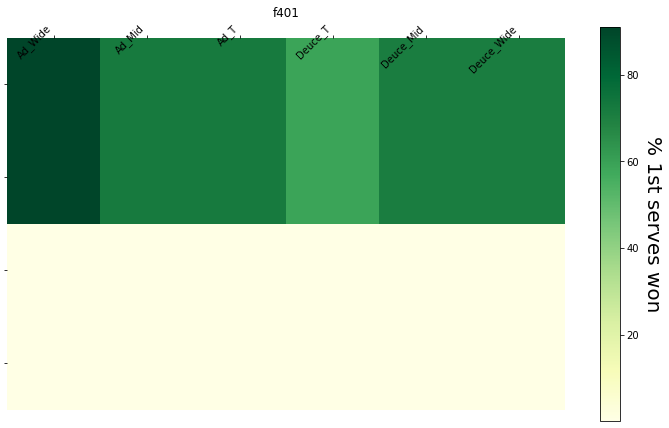

f401


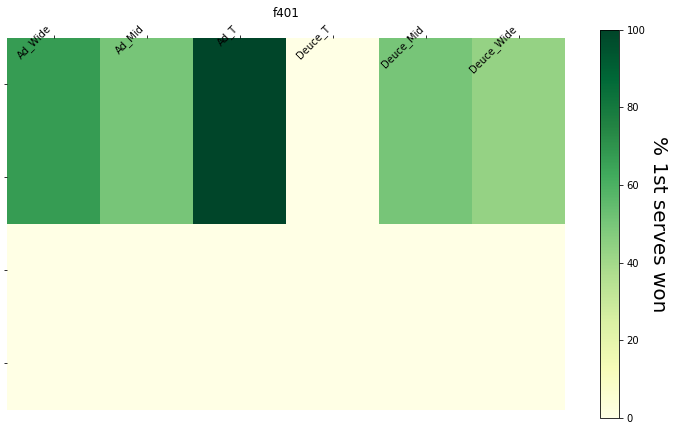

f401


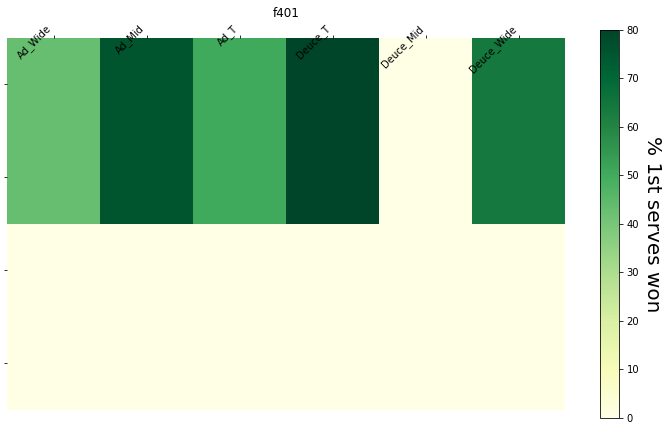

G858


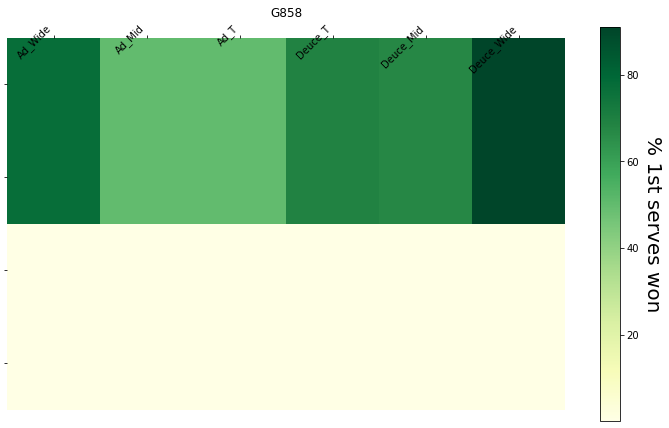

H804


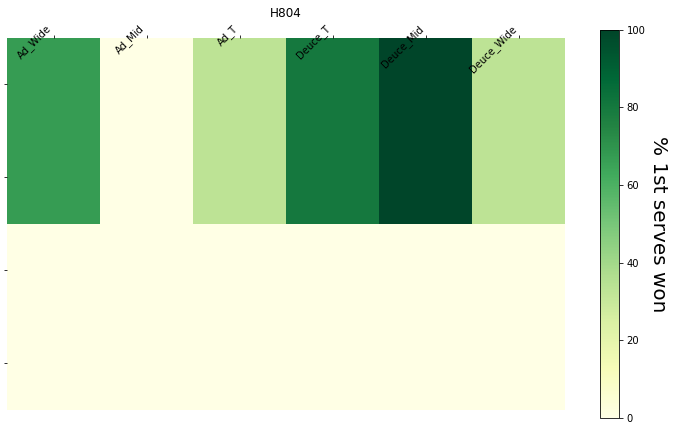

K966


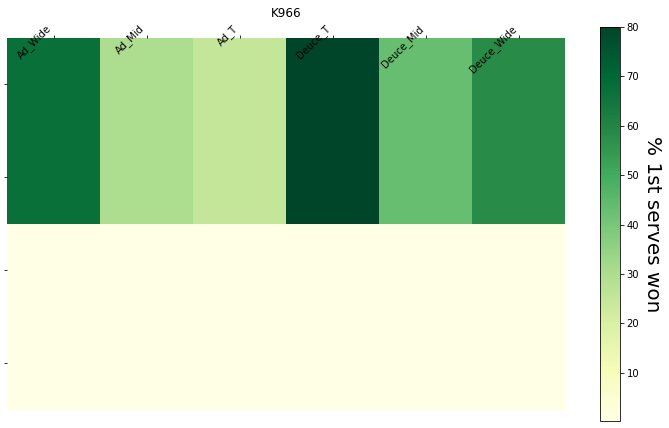

PD31


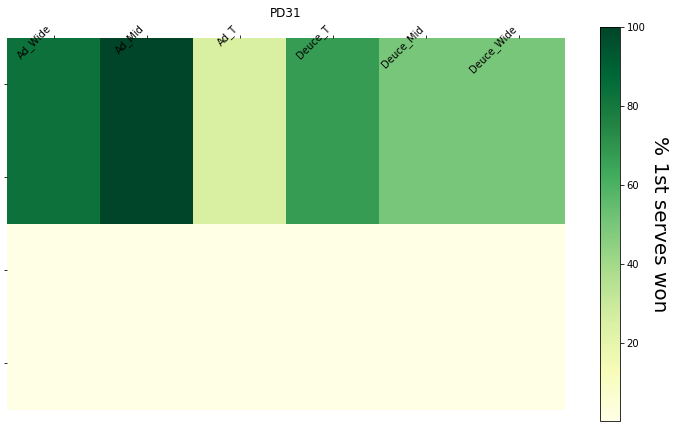

R772


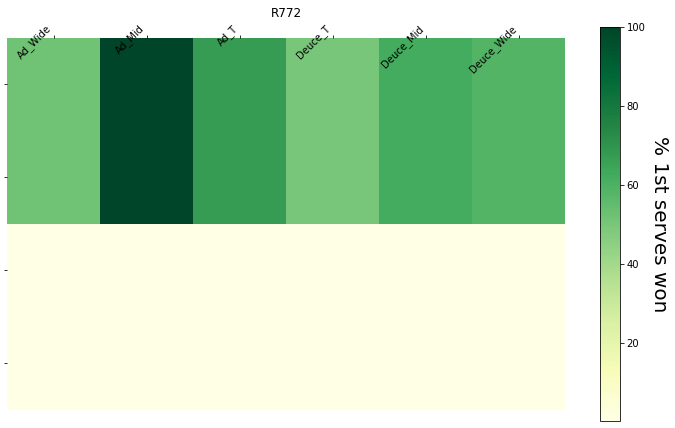

b747


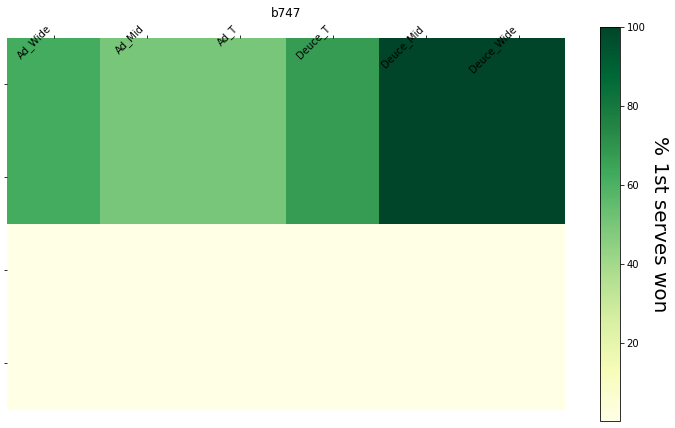

g476


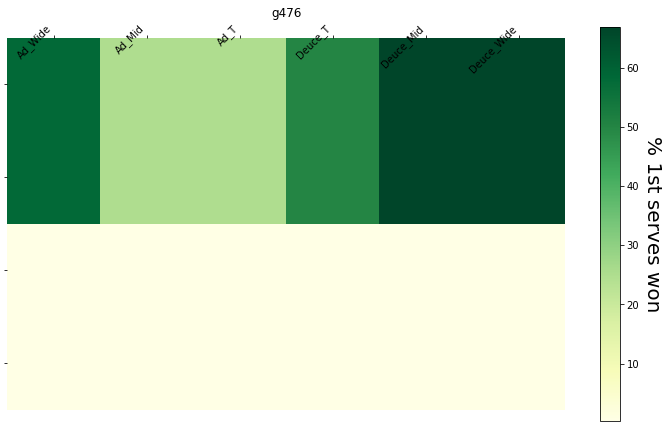

g892


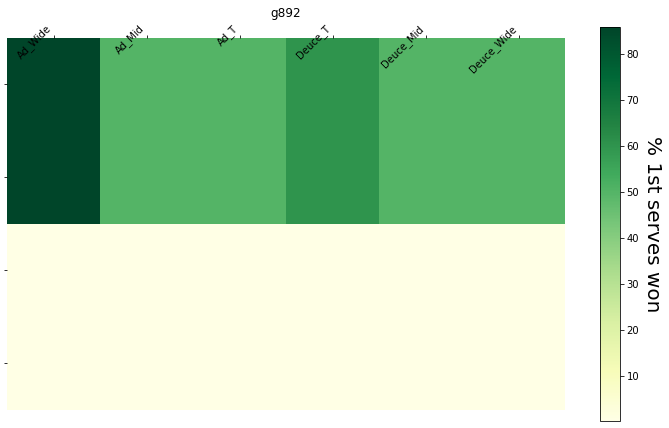

h528


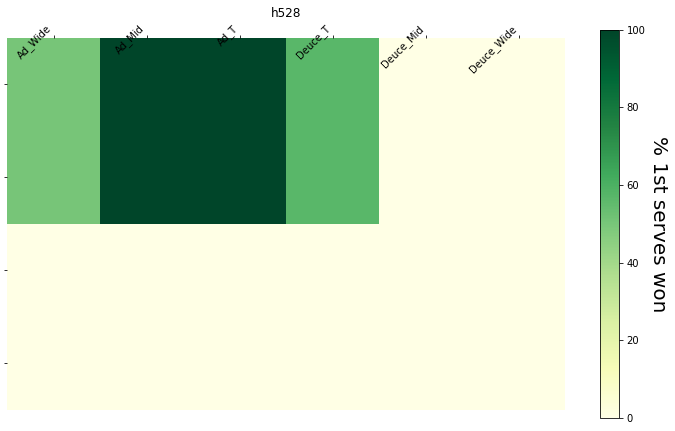

K926


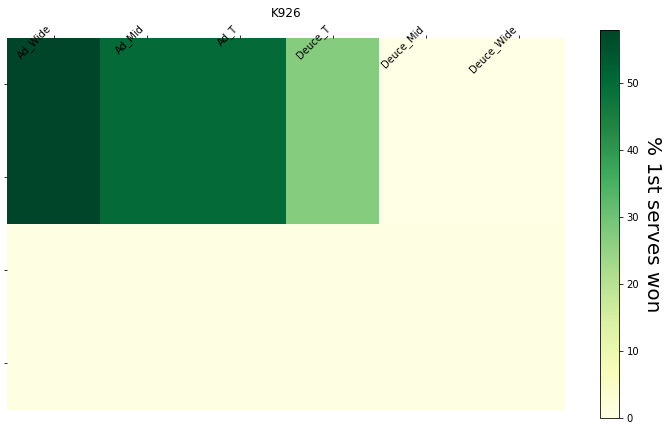

M824


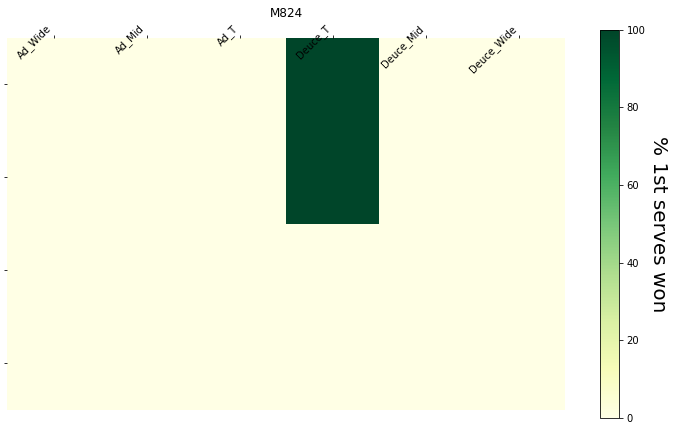

M824


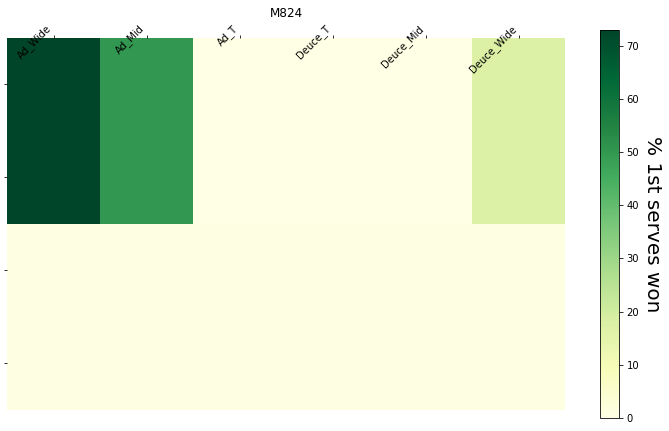

r419


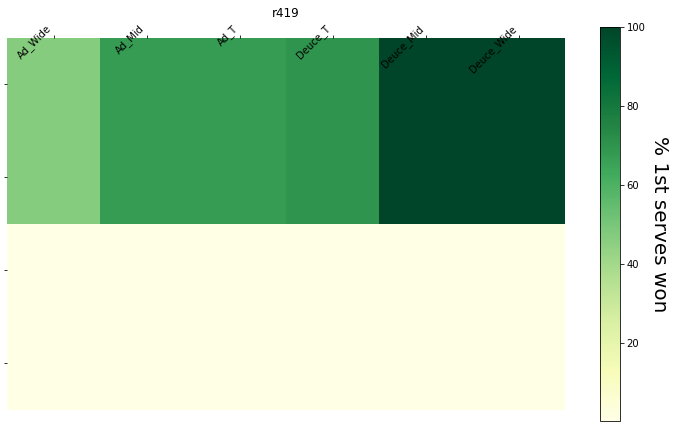

D616


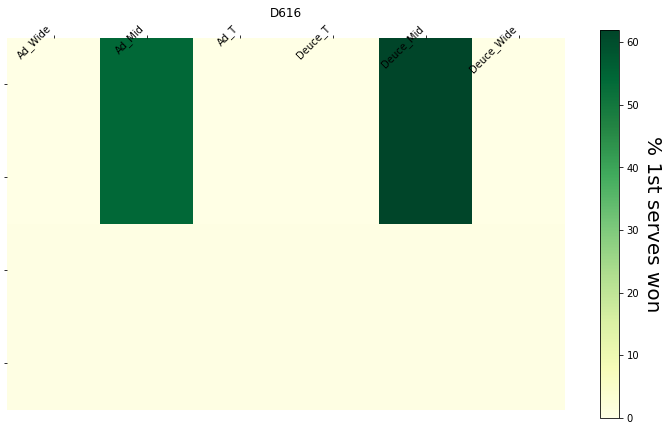

g628


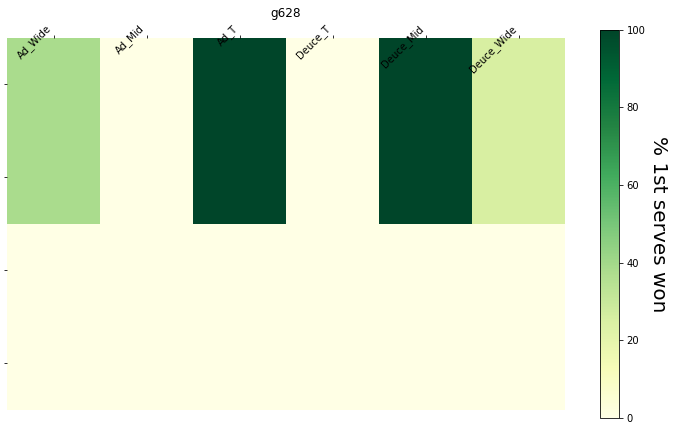

g628


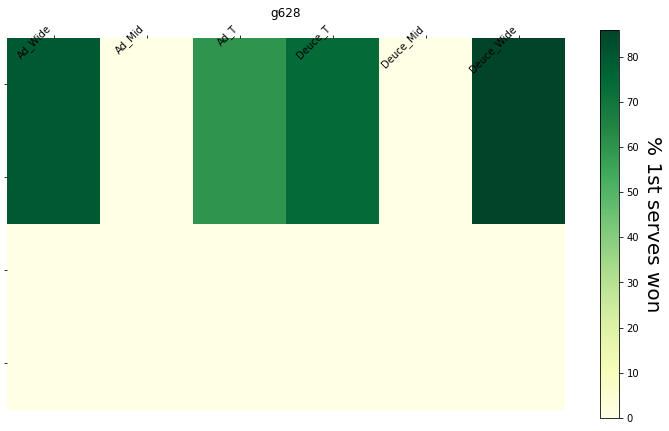

G710


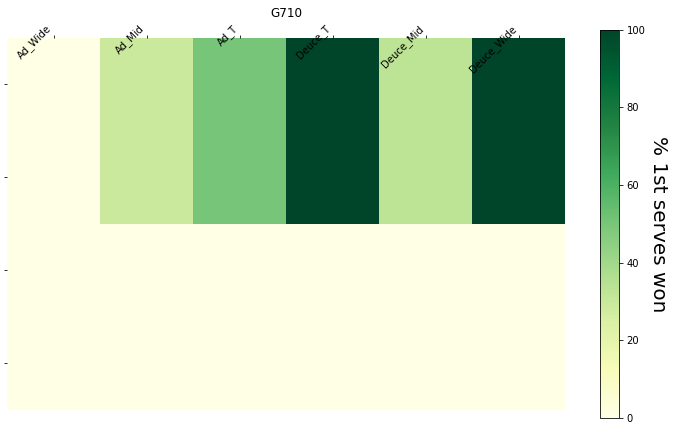

h355


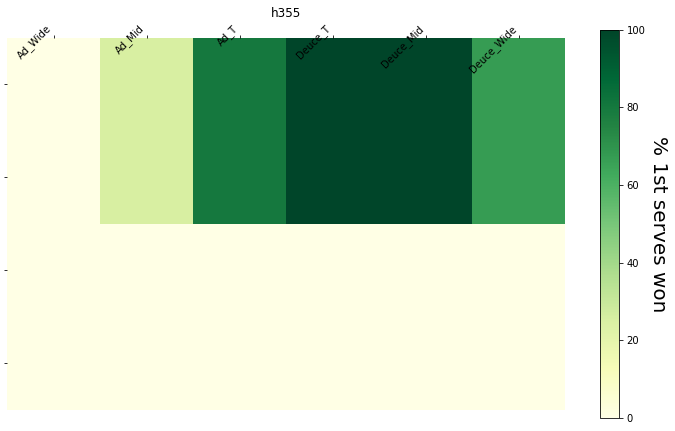

h355


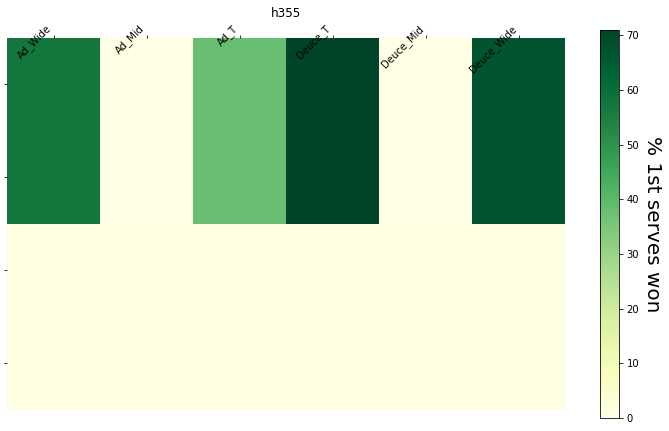

h996


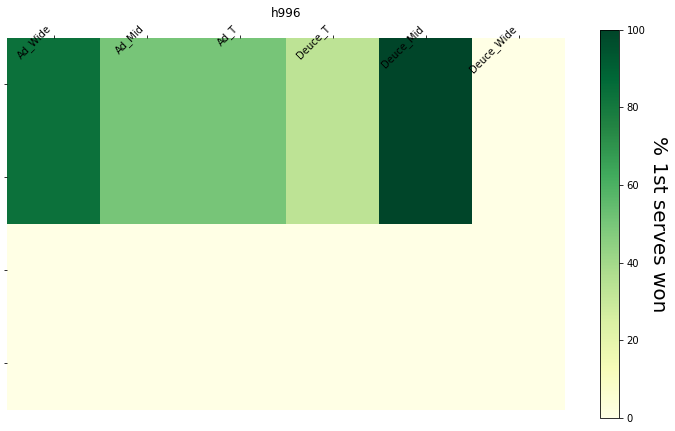

i165


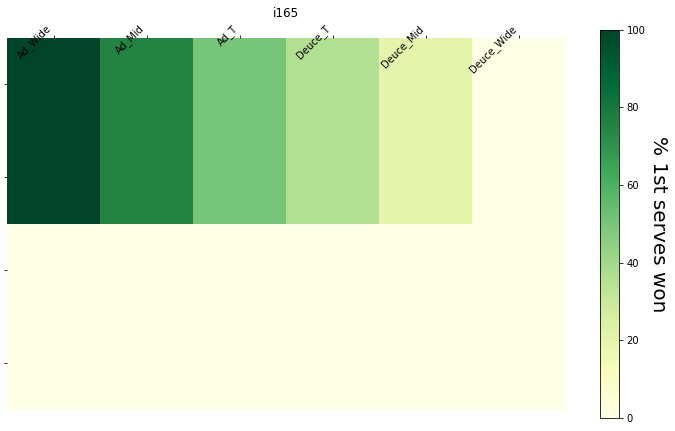

MB02


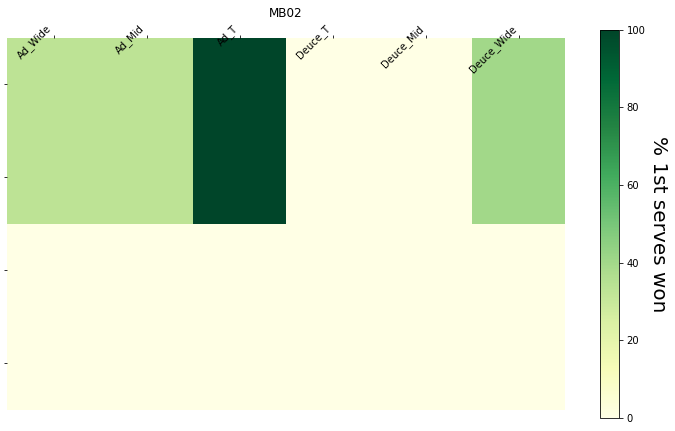

MA21


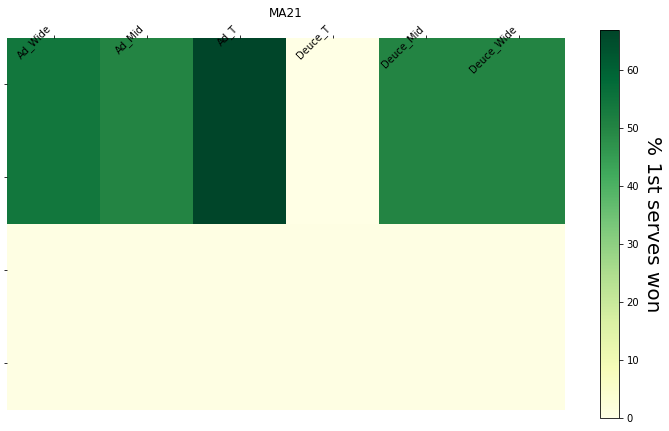

MA21


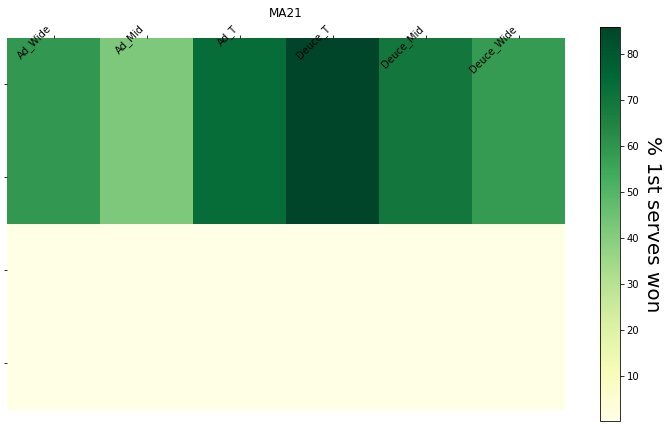

N289


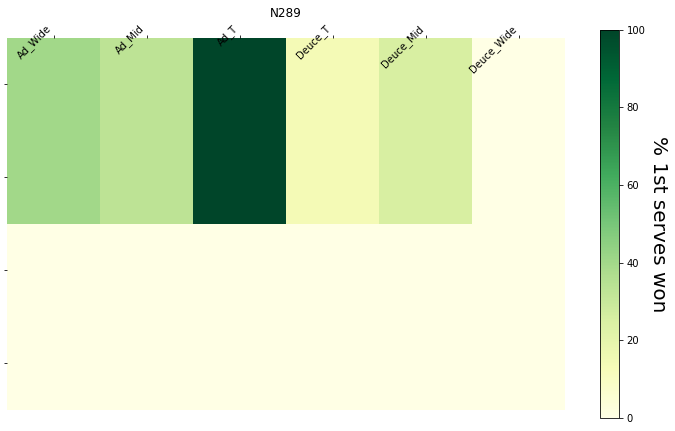

R685


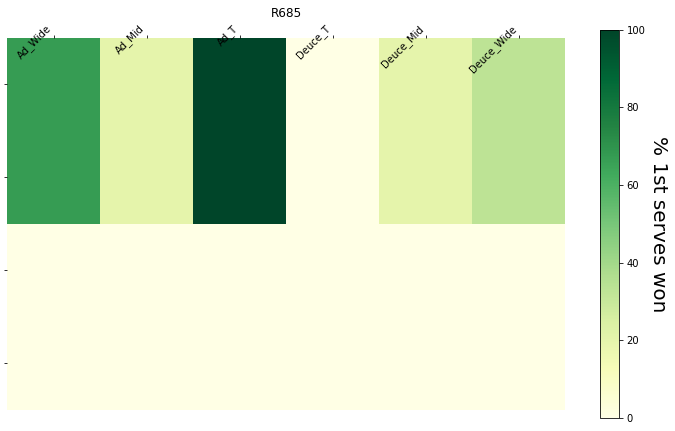

A596


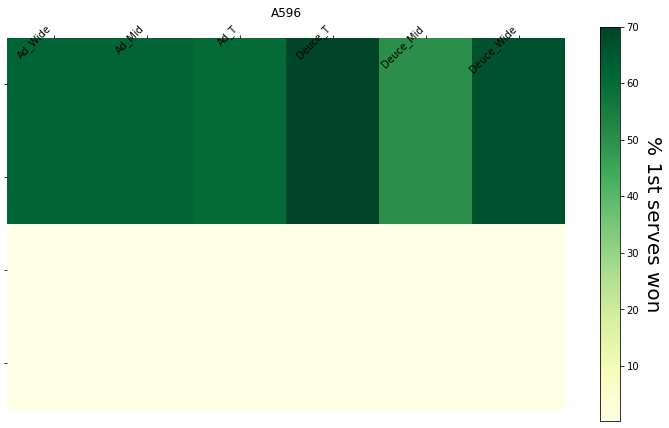

d402


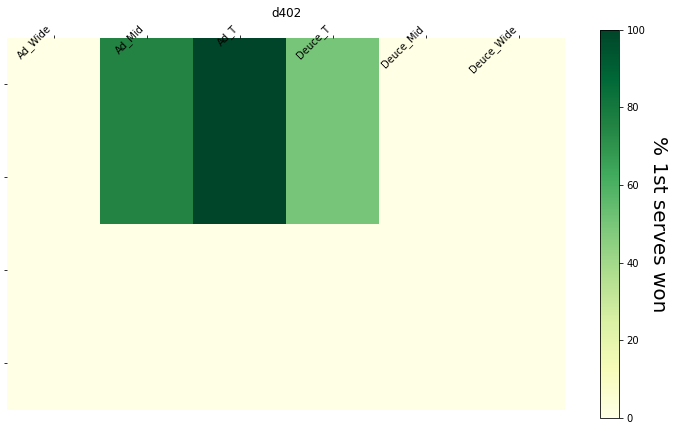

G676


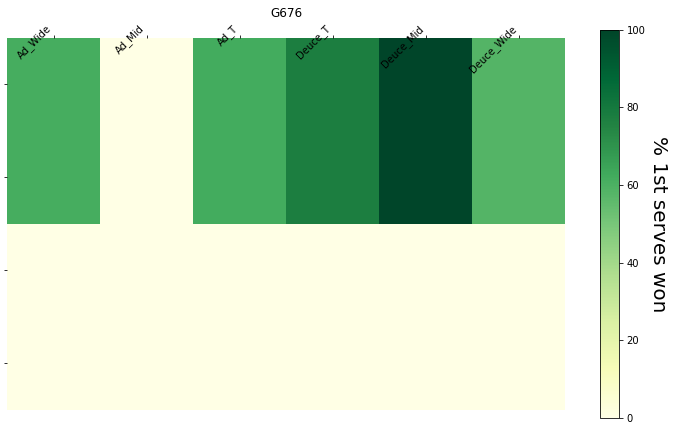

G806


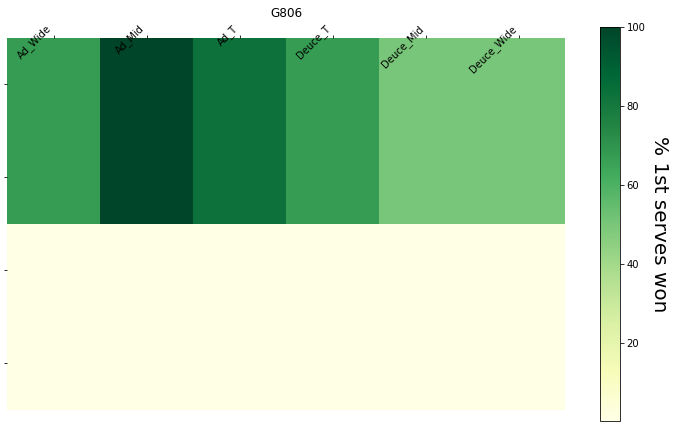

H756


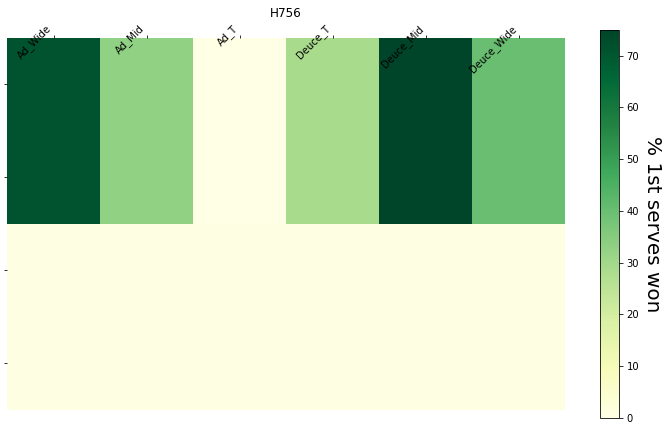

In [152]:
import matplotlib.pyplot as plt
color_array = np.array([0.3]*6)
Opponent="Opponent"
Players = ["","","",'']
Serve_position = ["Ad_Wide", "Ad_Mid", "Ad_T",
"Deuce_T", "Deuce_Mid", "Deuce_Wide"]

for i, player in enumerate(player_ids):
    print(player)
    player_serves = np.stack((serves[i],serves[i], color_array, color_array))
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(10)

    im, cbar = heatmap(player_serves, Players, Serve_position, ax=ax,
                       cmap="YlGn", cbarlabel="% 1st serves won")
    #texts = annotate_heatmap(im, valfmt="{x:.1f} t")
    ax.set_title(f"{player}")
    fig.tight_layout()
    plt.savefig(f'/Users/Tomi/Downloads/Heatmaps/{player}.png')
    plt.show()
    